## <p><center style="background-color:#AED6F1   ;font-family:Times New Roman;color:#662200;font-size:210%;text-align:center;border-radius:10px 70px;">  Credit Card Fraud Detection Predictive Models 📰 </center></p>

<center><img src="credit-card-fraud.jpg" alt="Alt text" style="width: 770px;"/></center>

# <p style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;"> Introduction 📒:</p>
The datasets contains transactions made by credit cards in <b>September 2013</b> by european cardholders. This dataset presents transactions that occurred in two days, where we have <b>492 frauds</b> out of <b>284,807 transactions.</b> The dataset is <b>highly unbalanced</b>, the <b>positive class (frauds)</b> account for <b>0.172% of all transactions.</b>

We have to build a <b>classification model</b> to predict whether a transaction is fraudulent or not.

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 20px;">
    <h3>Dataset Discription 🗒️: </h3>
    
- Features <b>V1, V2, ... V28</b> are the <b>principal components</b> obtained with <b>PCA;</b>
- The only features which have not been transformed with PCA are <b>Time and Amount.</b> Feature <b>Time</b> contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature <b>Amount</b> is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
- Feature <b>Class</b> is the response variable and it takes value <b>1</b> in case of fraud and <b>0</b> otherwise.

  * Due to confidentiality issues, there are not provided the original features and more background information about the data.

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
 <h2> Note 📝:</h2>
    
* The first feature is<b> "Time"</b>, which represents the number of seconds elapsed between the transaction and the first transaction in the dataset. The next 28 features, V1 to V28, are anonymized variables resulting from a principal component analysis (PCA) transformation of the original features. They represent different aspects of the transaction, such as the amount, location, and type of transaction.

- The second last feature is <b>"Amount"</b>, which represents the transaction amount in USD. The last feature is the <b>"Class"</b> label, which indicates whether the transaction is fraudulent (class 1) or not (class 0).

- Overall, this dataset is used to train machine learning models to detect fraudulent transactions in real-time. The features are used to train the model to learn patterns in the data, which can then be used to detect fraudulent transactions in future transactions.
</div>

<a id="table_content"></a>

# Table of Contents
- **[1. Import Required Libraries](#1)**
- **[2. Read Dataset](#2)**
- **[3. Understand Dataset](#3)**
   - **[3.1. Missing value Treatment](#3.1)**
   - **[3.2. Check data Unbalance](#3.2)**
- **[4. Exploratory data analysis (EDA)](#4)**
   - **[4.1. Distribution Plot](#4.1)**
   - **[4.2. Imbalance Data Graph plot](#4.2)**
   - **[4.3. KDE Plot](#4.3)**
   - **[4.4. LinePlots](#4.4)**
   - **[4.5. Box Plot](#4.5)**
   - **[4.6. Scatter Plot](#4.6)**
   - **[4.7. Features Correlation](#4.7)**
   - **[4.8. LMPlot](#4.8)**
   - **[4.9. Features density plot](#4.9)**
- **[5. Predictive Models](#5)**
   - **[5.1. Train Test Split](#5.1)**
   - **[5.2. Balanced Data using Over-sampling Technique](#5.2)**
- **[6. Logistic regression Model](#6)**
   - **[6.1. Model Scores](#6.1)**
   - **[6.2. Feature Importance](#6.2)**
   - **[6.3. Confusion Matrix](#6.3)**
   - **[6.4. (ROC) Curve](#6.4)**
- **[7. Random Forest Classification Model](#7)**
   - **[7.1. Model Scores](#7.1)**
   - **[7.2. Feature Importance](#7.2)**
   - **[7.3. Confusion Matrix](#7.3)**
   - **[7.4. (ROC) Curve](#7.4)**
- **[8. XGboost Classifier](#8)**
   - **[8.1. Model scores](#8.1)**
   - **[8.2. Feature Importance](#8.2)**
   - **[8.3. Confusion Matrix](#8.3)**
   - **[8.4. (ROC) Curve](#8.4)**
- **[9. Decision Tree Classifier Model](#9)**
   - **[9.1. Model Scores](#9.1)**
   - **[9.2. Feature Importance](#9.2)**
   - **[9.3. Confusion matrix](#9.3)**
   - **[9.4. (ROC) Curve](#9.4)**
   - **[9.5. Decision Tree Graph](#9.5)**
- **[10. Naive Bayes Classifier Model](#10)**
   - **[10.1. Standard Scaling](#10.1)**
   - **[10.2. Hyperparameter tuning using GridSearchCV](#10.2)**
   - **[10.3. Model Scores](#10.3)**
   - **[10.4. Feature Importance](#10.4)**
   - **[10.5. Confusion Matrix](#10.5)**
   - **[10.6. (ROC) Curve](#10.6)**
- **[11. k-Nearest Neighbors (k-NN) classifier Model](#11)**
   - **[11.1. Standard Scaling](#11.1)**
   - **[11.2. Model Scores](#11.2)**
   - **[11.3. Confusion Matrix](#11.3)**
   - **[11.4. (ROC) Curve](#11.4)**
- **[12.  Compare All Models scores :](#12)**

<a id='1'></a>
# 1: Import Required Libraries
⤴️[Table Contents](#table_content)

In [173]:
import gc
from datetime import datetime
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

warnings.filterwarnings("ignore")

<a id='2'></a>
# 2: Read Dataset
⤴️[Table Contents](#table_content)

In [174]:
df = pd.read_csv('creditcard.csv')

In [175]:
print("Credit Card Fraud Detection data :-  \nRows:",df.shape[0],"\nColumns:", df.shape[1])

Credit Card Fraud Detection data :-  
Rows: 284807 
Columns: 31


In [176]:
# Pandas settings
pd.set_option('display.max_columns', 100)

In [177]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [178]:
df[df["Class"]==1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [179]:
df[df["Amount"]==0.00].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,-0.059943,-0.508270,0.425506,0.414309,-0.698375,-1.465349,-0.119009,-0.144735,-1.332221,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,0.241979,0.144973,-0.583891,-1.595345,0.032613,0.752834,-0.094286,-0.163427,-1.111176,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,0.511284,-0.178159,0.762909,1.700923,-0.133861,0.402418,0.684668,-0.609395,-0.704277,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,-0.371622,0.859741,0.372609,-1.240185,0.998391,-0.346387,-0.391679,0.348289,0.282125,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0


<a id='3'></a>
# 3: Understand Dataset
⤴️[Table Contents](#table_content)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**In this dataset time column is not in correct Data type it should be a Datetime column but its datatype is in float**

In [181]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).**

<a id='3.1'></a>
# 3.1 Missing value Treatment
⤴️[Table Contents](#table_content)

* **Let's check and find is there any missing value present in Dataset**

In [182]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


**There is no missing data in the entire dataset.**

* **Let's check for data with Amount is 0 and remove such transactions.**

In [183]:
count_class_zero_amount = len(df[(df['Class'] == 0) & (df['Amount'] == 0.00)])
count_class_ones_amount = len(df[(df['Class'] == 1) & (df['Amount'] == 0.00)])
print("Class 0 with amount as 0 : ",count_class_zero_amount, "\nClass 1 with amount as 0: ", count_class_ones_amount)

Class 0 with amount as 0 :  1798 
Class 1 with amount as 0:  27


In [184]:
print('Credit Card Fraud Detection data :- \nRows:',df.shape[0],'\nColumns:',df.shape[1])

Credit Card Fraud Detection data :- 
Rows: 284807 
Columns: 31


<a id='3.2'></a>
# 3.2: Check data Unbalance
⤴️[Table Contents](#table_content)

* **Let's check data unbalance with respect with target value, i.e. Class.**

In [185]:
print('Comparison of Class Column Values :- \n0: ',df["Class"].value_counts()[0],
      '\n1: ',df["Class"].value_counts()[1])

Comparison of Class Column Values :- 
0:  284315 
1:  492


In [186]:
print('Comparison of class Column Values in Percentage:- \n0: ',df["Class"].value_counts()[0]/len(df)*100,
      '\n1: ',df["Class"].value_counts()[1]/len(df)*100)

Comparison of class Column Values in Percentage:- 
0:  99.82725143693798 
1:  0.1727485630620034


<a id='4'></a>
# 4: Exploratory data analysis (EDA)
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Discription 📝:</h3>
    
- <b>Understanding the Data:</b> EDA is the first step in any data analysis project. It helps data scientists gain insights into the structure, patterns, and relationships present in the dataset. By visualizing the data and summarizing its characteristics, analysts can better understand its properties and make informed decisions about subsequent analysis steps.

- <b>Data Cleaning and Preprocessing:</b> EDA often involves identifying and handling missing values, outliers, and inconsistencies in the data. By visualizing distributions and relationships, analysts can determine the appropriate preprocessing steps needed to clean the data and prepare it for modeling.

- <b>Feature Engineering:</b> EDA helps in generating new features or transforming existing ones to improve model performance. By examining the relationships between variables and understanding their significance, analysts can create meaningful features that capture the underlying patterns in the data.

- <b>Model Selection and Validation:</b> EDA provides insights that inform the choice of appropriate modeling techniques and evaluation metrics. By analyzing the distribution of the target variable and exploring its relationship with predictor variables, analysts can select models that are well-suited to the data and evaluate their performance effectively.
  
- <b>Communication and Collaboration:</b> EDA notebooks serve as a means of communication and collaboration within the data science community. By sharing insights, visualizations, and code snippets, analysts can learn from each other's approaches, share best practices, and collaborate on solving common challenges.

<p>Overall, EDA is a critical step in the data analysis process. It serves as the foundation for subsequent analysis steps and is essential for deriving meaningful insights from data.</p>

<a id='4.1'></a>
# 4.1: Distribution Plot
⤴️[Table Contents](#table_content)

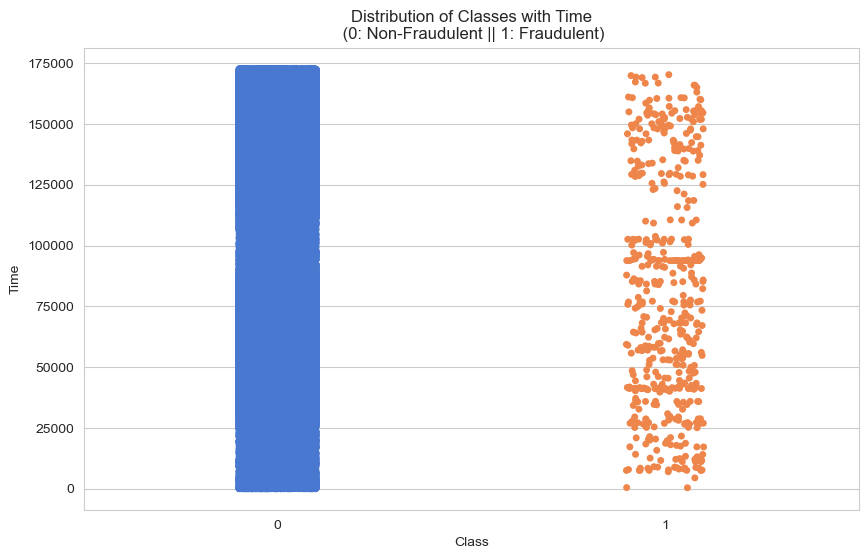

In [187]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df, palette='muted')
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

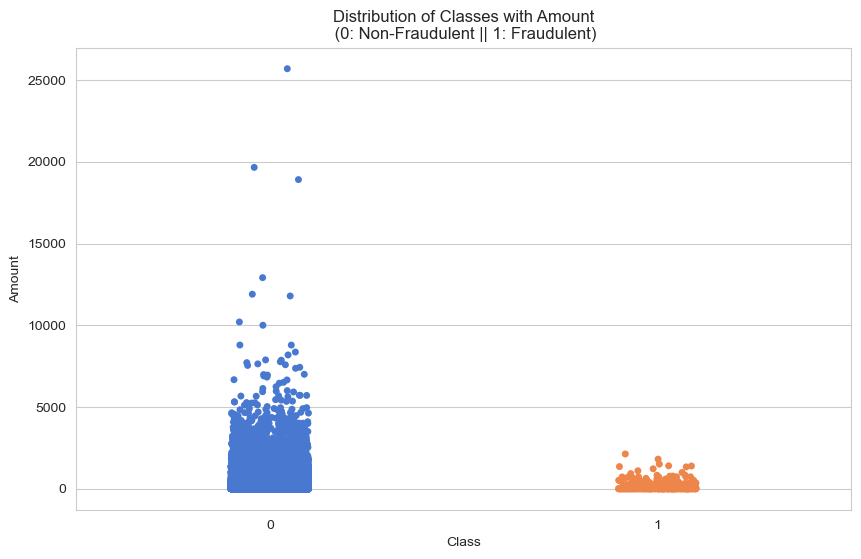

In [188]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df, palette='muted')
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

<a id='4.2'></a>
# 4.2: Imbalance Data Graph plot 
⤴️[Table Contents](#table_content)

In [189]:
# Calculate value counts for the 'Class' column in data_df
temp = df["Class"].value_counts()

In [190]:
# Create a DataFrame from the value counts
count_df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

In [191]:
# Define a Bar trace for plotly
trace = go.Bar(
    x=count_df['Class'],  # X-axis values from the 'Class' column of DataFrame
    y=count_df['values'],  # Y-axis values from the 'values' column of DataFrame
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",  # Trace name
    marker=dict(color="orange"),  # Marker color
    text=count_df['values']  # Text to be displayed on hover
)

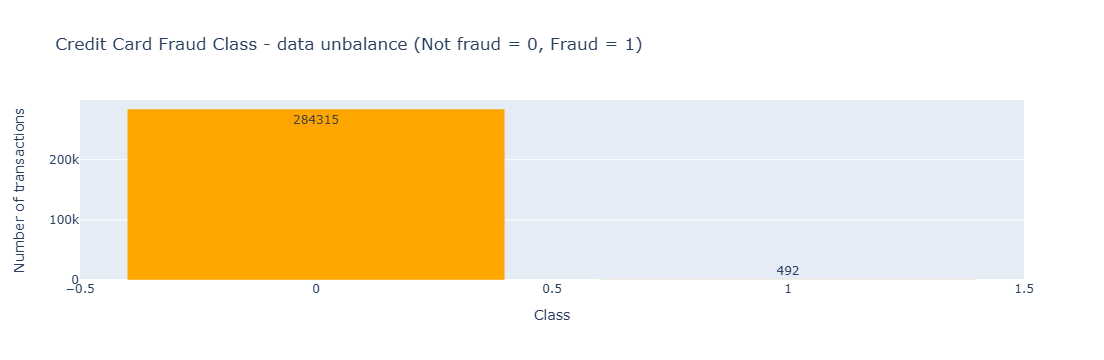

In [192]:
# Combine the trace into a list
data = [trace]

# Define the layout for the plot
layout = dict(
    title='Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',  # Plot title
    xaxis=dict(title='Class', showticklabels=True),  # X-axis label and tick settings
    yaxis=dict(title='Number of transactions'),  # Y-axis label
     hovermode='closest',  # Hover mode
    width=600  # Width of the plot
)

# Combine data and layout into a dictionary representing the figure
fig = dict(data=data, layout=layout)

# Plot the figure using plotly
iplot(fig, filename='class')

**Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.**

<a id='4.3'></a>
# 4.3: KDE Plot
⤴️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 20px;">
<h3>Discription 📝:</h3>

<p>Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.</p>


<p>The plot created here is a <b>Kernel Density Estimation (KDE) plot.</b></p>

<li> A KDE plot is a non-parametric way to estimate the probability density function of a continuous random variable.
<li> In this case, the KDE plot estimates the probability density of the 'Time' feature for both fraudulent and non-fraudulent transactions.</li>
<li> The KDE plot is created using Plotly's ff.create_distplot() function, which generates a plot with both KDE curves for the provided data.</li>
<li> The hist_data variable contains the data for the KDE plot, with class_0 representing the 'Time' values for non-fraudulent transactions and class_1 representing the 'Time' values for fraudulent transactions.</li>
<li> group_labels specify the labels for the two groups in the plot: 'Not Fraud' and 'Fraud'.</li>
<li> The show_hist=False parameter is used to hide the histogram bars, and show_rug=False parameter is used to hide the rug plot.</li>
<li> The layout of the plot is updated to include a title ('Credit Card Transactions Time Density Plot') and an x-axis label ('Time [s]').
The figure is plotted using iplot() function from Plotly.</li>

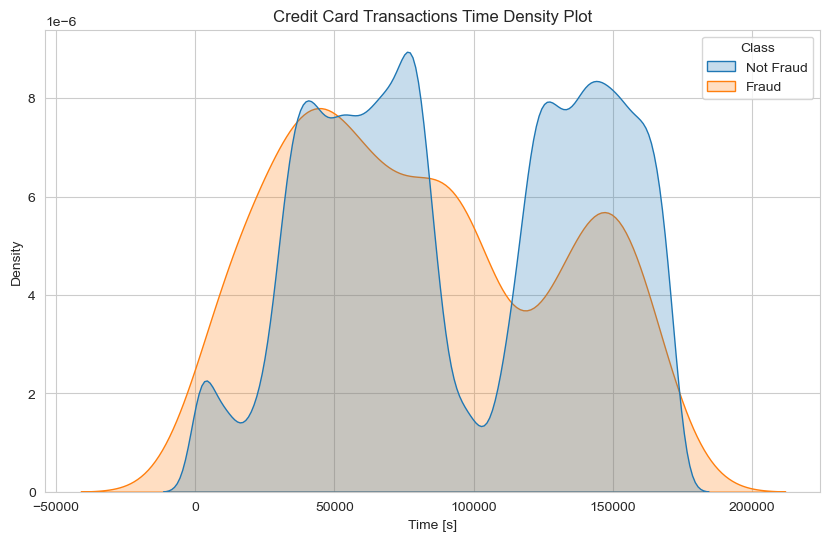

In [193]:
# Select the 'Time' column where 'Class' is 0 (not fraud)
time_not_fraud = df[df['Class'] == 0]['Time']

# Select the 'Time' column where 'Class' is 1 (fraud)
time_fraud = df[df['Class'] == 1]['Time']

# Create a DataFrame for easier plotting
df_not_fraud = pd.DataFrame({'Time': time_not_fraud, 'Class': 'Not Fraud'})
df_fraud = pd.DataFrame({'Time': time_fraud, 'Class': 'Fraud'})

# Combine the DataFrames
df_combined = pd.concat([df_not_fraud, df_fraud])

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a density plot using seaborn
sns.kdeplot(data=df_combined, x='Time', hue='Class', common_norm=False, fill=True)

# Update layout with title and x-axis label
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')

# Show the plot
plt.show()

<a id='4.4'></a>
# 4.4: LinePlots
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">

<li> A <b>line plot</b> displays data points connected by straight lines.</li>
<li> This plot allows us to visualize the variation in total transaction amounts over time for both non-fraudulent and fraudulent transactions.</li>
    
<p>Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.</p>

In [194]:
# Create a new column 'Hour' by applying a lambda function to 'Time' column,
# which calculates the hour corresponding to each timestamp and floors it.
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Group data by 'Hour' and 'Class' columns, then calculate various statistics
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()

# Convert the resulting grouped data into a new DataFrame
data_df = pd.DataFrame(tmp)

# Remove hour column from original dataset
df = df.drop(columns='Hour',axis=1)

# Rename columns for clarity
data_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']

print(data_df[data_df["Class"]==1]["Hour"].count())

# Display the first few rows of the DataFrame
data_df.head()

46


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


***************** Blue Line data representation is 0 class Transactions, and Red line data representation is 1 class Transactions **********************


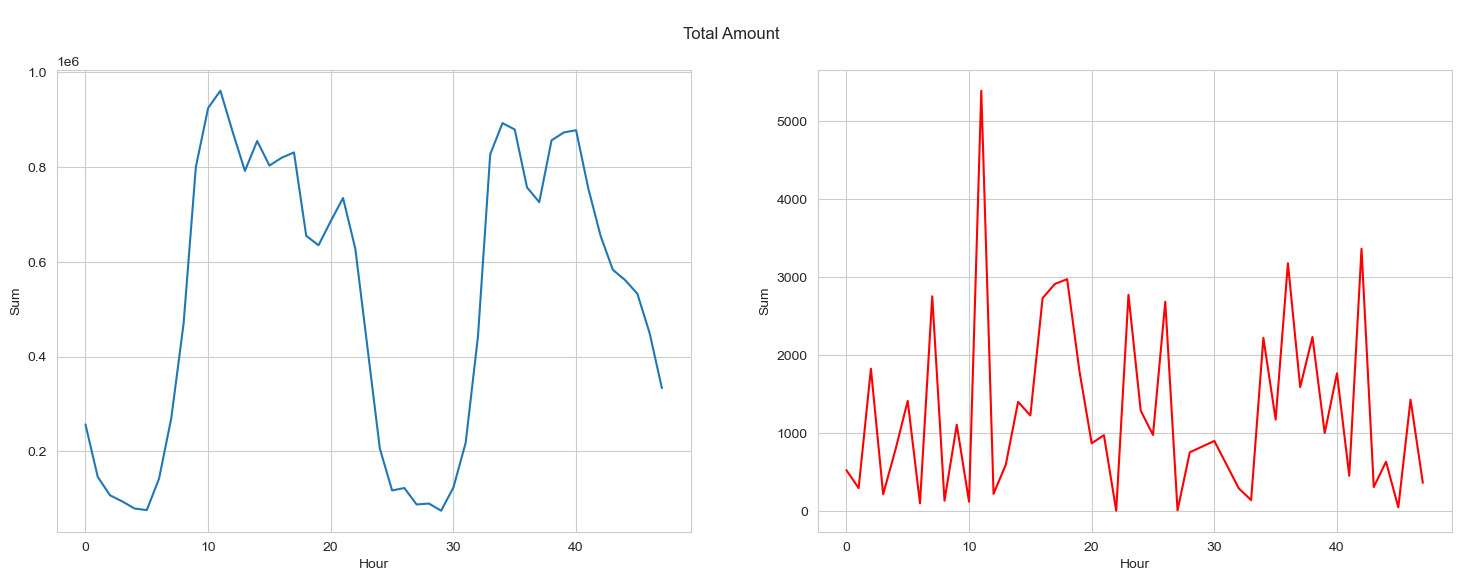

In [195]:
# Create subplots with two axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

print('\033[1m*****************',
        'Blue Line data representation is 0 class Transactions, and Red line data representation is 1 class Transactions',
        '**********************\033[0m')

# Plot lineplot for Class 0 on the first axis
s = sns.lineplot(ax=ax1, x="Hour", y="Sum", data=data_df.loc[data_df.Class == 0])

# Plot lineplot for Class 1 on the second axis
s = sns.lineplot(ax=ax2, x="Hour", y="Sum", data=data_df.loc[data_df.Class == 1], color="red")

# Set the title for the overall figure
plt.suptitle("\nTotal Amount")

# Show the plot
plt.show()

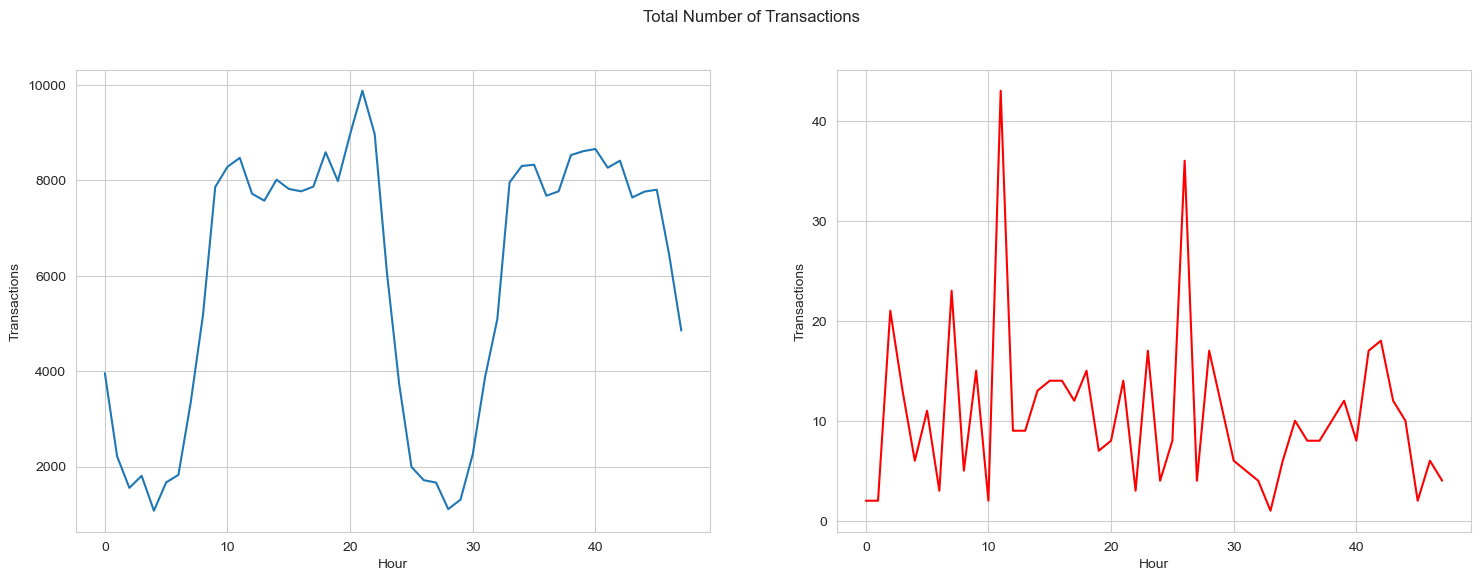

In [196]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

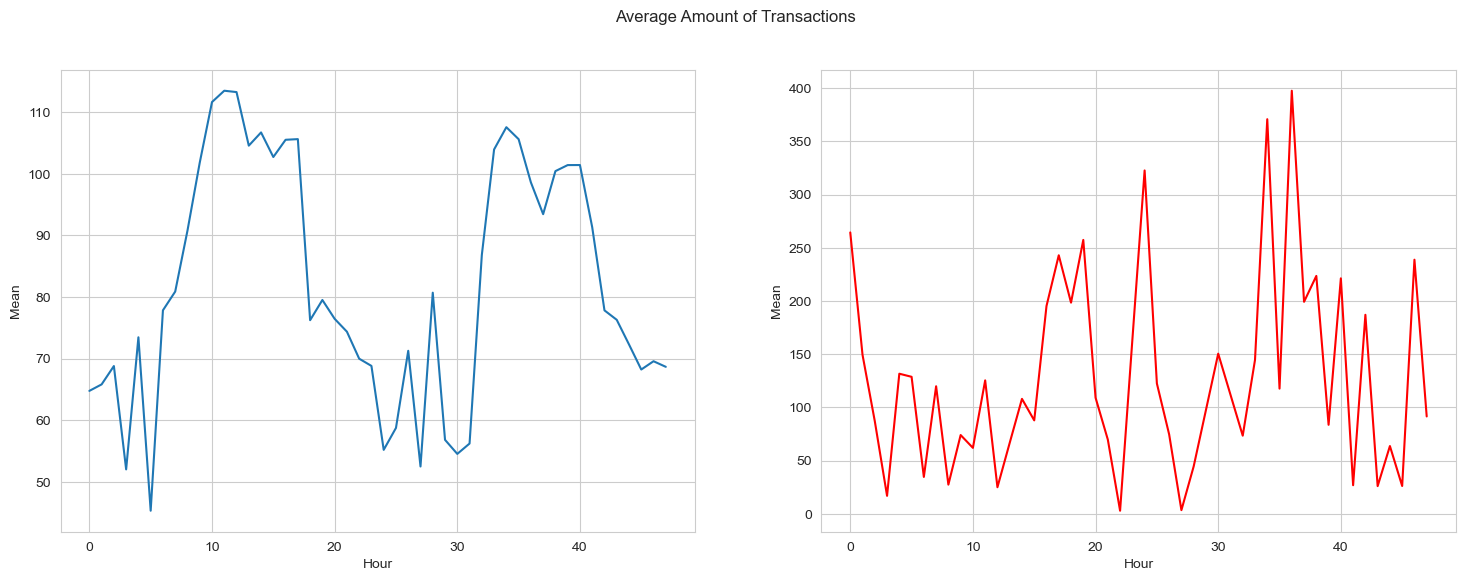

In [197]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

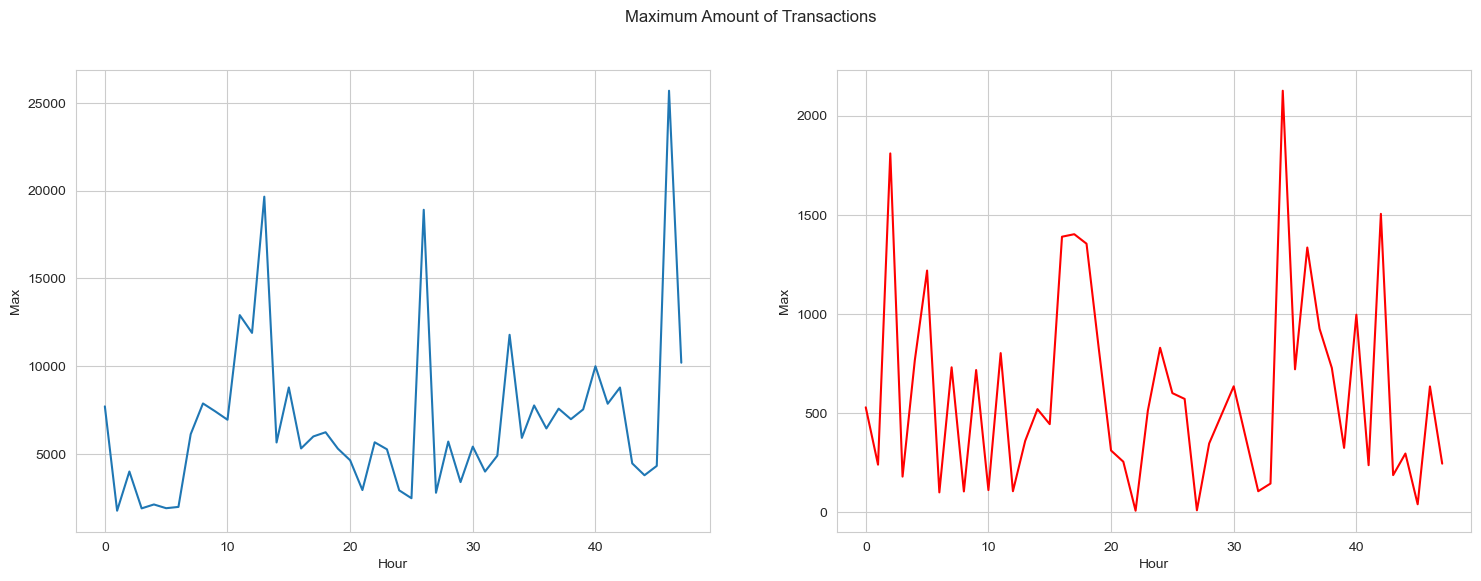

In [198]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

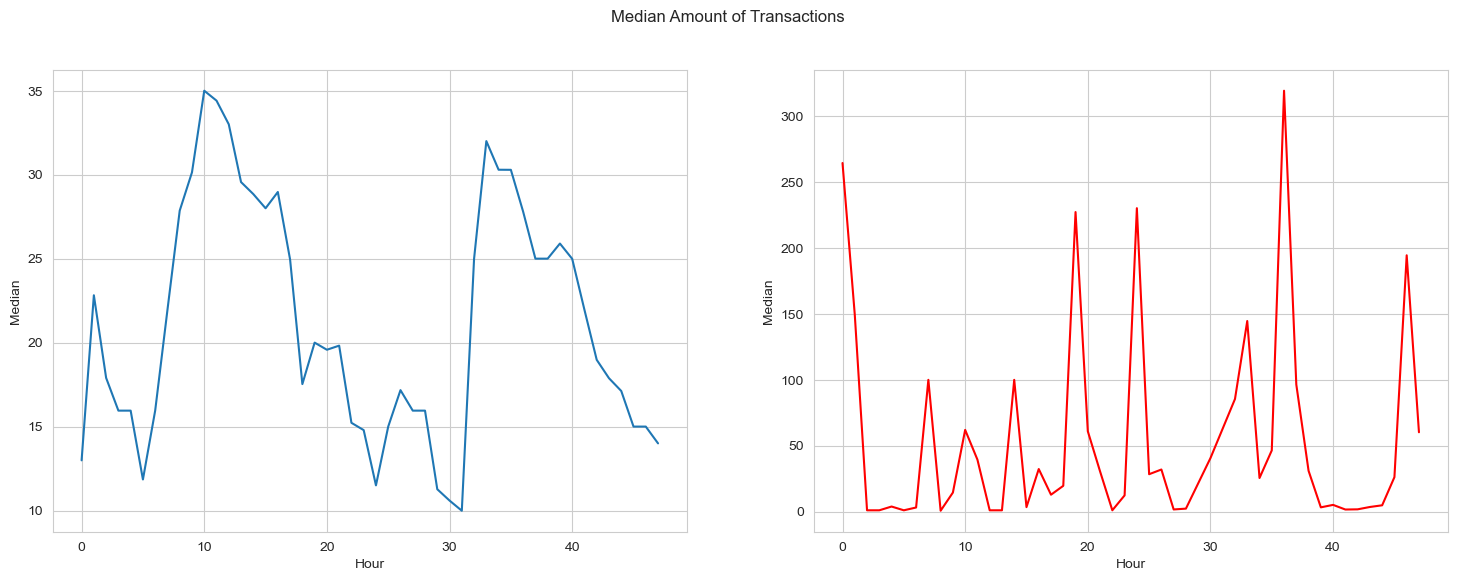

In [199]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

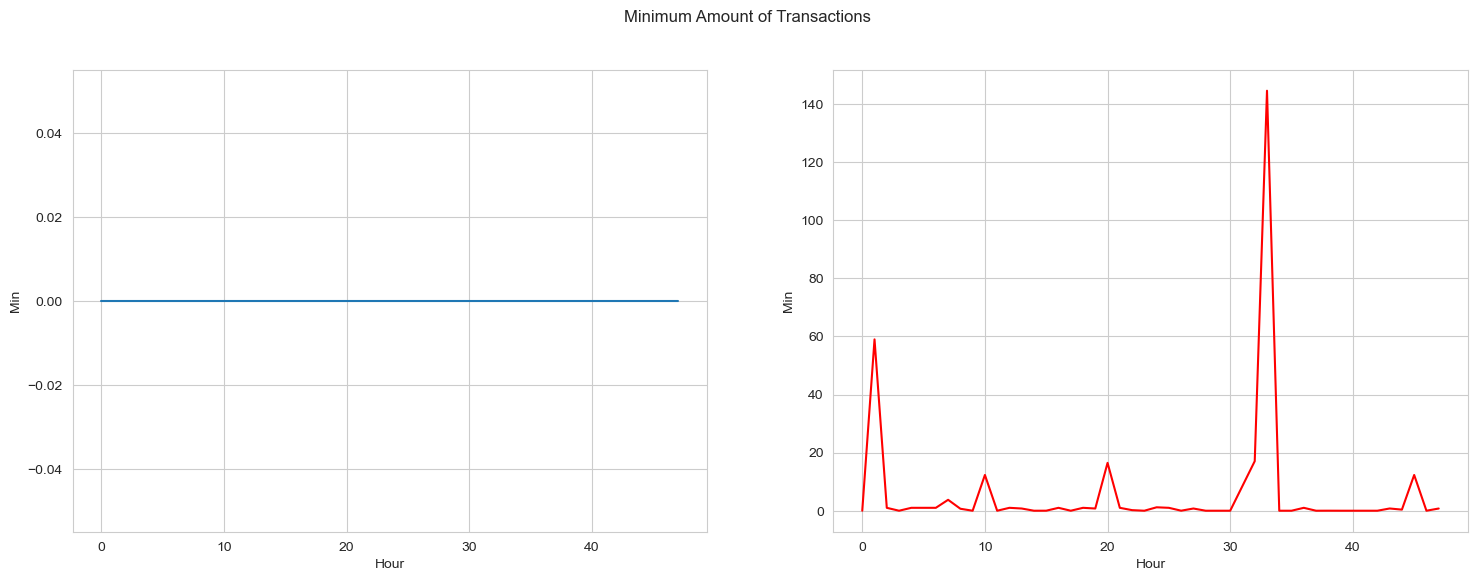

In [200]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

<a id='4.5'></a>
# 4.5: Box Plot
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Transactions amount</h3>
<b>Box PLot</b>
<p>This plot consists of two side-by-side boxplots:</p>

<li>The left boxplot (ax1) shows the distribution of transaction amounts (Amount) for each class (Class), with outliers included.</li>
<li>The right boxplot (ax2) shows the same distribution but with outliers excluded.</li>

<b>Explanation:</b>

- A boxplot is a graphical representation of the distribution of data based on the five-number summary: minimum, first quartile (Q1), median (second        quartile or Q2), third quartile (Q3), and maximum.</li>
- The central box spans from Q1 to Q3, with a line at the median (Q2).</li>
- Whiskers extend from the edges of the box to show the range of the data, excluding outliers.</li>
- Outliers are data points that fall below Q1 - 1.5 IQR (interquartile range) or above Q3 + 1.5 IQR, where IQR = Q3 - Q1.</li>
- The hue parameter splits each box by class, allowing us to compare the distribution of transaction amounts between the two classes (fraudulent and        non-fraudulent).</li>
- The color palette ("PRGn") specifies the colors used for each class.</li>
- The showfliers parameter controls whether outliers are shown or not. In the left plot, showfliers=True, so outliers are included, while in the right plot, showfliers=False, so outliers are excluded.</li>
- By comparing the two boxplots, we can observe how the presence or absence of outliers affects the visualization of the distribution of transaction amounts between the two classes.</li>

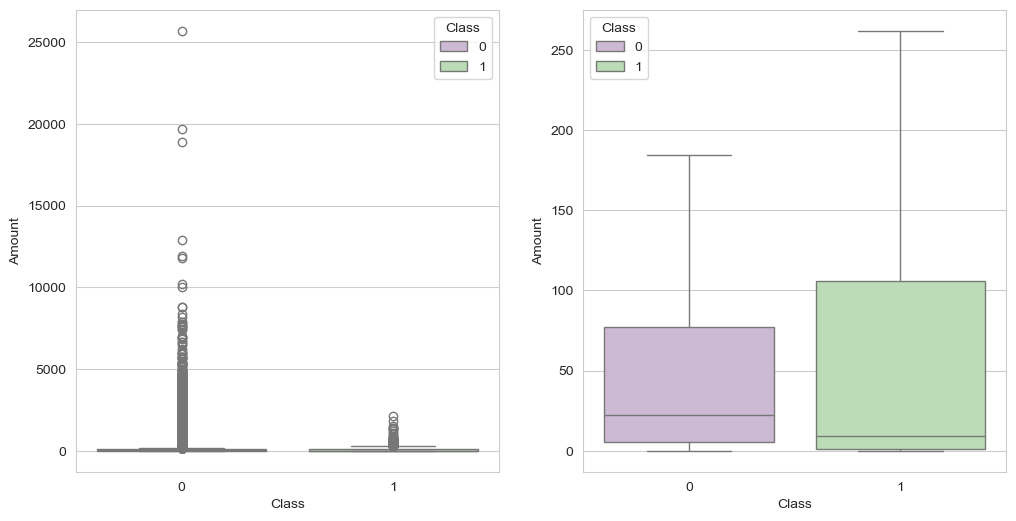

In [201]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [202]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [203]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

* **The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.**

* **Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).**

<a id='4.6'></a>
# 4.6: Scatter Plot
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">

<p>A <b>scatter plot</b> is a type of data visualization that displays individual data points as markers on a two-dimensional plane, with one variable on each axis. Here's a brief overview of scatter plots:</p>

- <b>Purpose:</b> Scatter plots are used to visualize the relationship between two continuous variables. They help identify patterns, trends, and relationships in the data.

- <b>Representation:</b> Each data point is represented by a marker, typically a circle, dot, or other shape. The position of the marker on the plot corresponds to the values of the two variables it represents.

- <b>Axes:</b> The horizontal axis (x-axis) represents one variable, while the vertical axis (y-axis) represents the other variable. Each axis is labeled with the name of the variable it represents.

- <b>Markers:</b> The markers on the plot can be customized with various attributes such as color, size, shape, and transparency. These attributes can be used to encode additional information about the data, such as categories or groups.

- <b>Patterns:</b> Scatter plots can reveal different patterns in the data, including linear relationships, nonlinear relationships, clusters, outliers, and correlations.

- <b>Interpretation:</b> By visually inspecting the scatter plot, analysts can interpret the relationship between the two variables. For example, if the points form a roughly straight line from bottom-left to top-right, it suggests a positive linear relationship. If the points are scattered randomly with no apparent pattern, it suggests no relationship between the variables.

- <b>Usage:</b> Scatter plots are commonly used in exploratory data analysis (EDA), regression analysis, correlation analysis, and outlier detection. They are also used to assess the effectiveness of models and visualize clusters in clustering algorithms.

<p>In summary, scatter plots provide a simple and effective way to explore the relationship between two variables and identify patterns in the data. They are a fundamental tool in data analysis and visualization.</p>

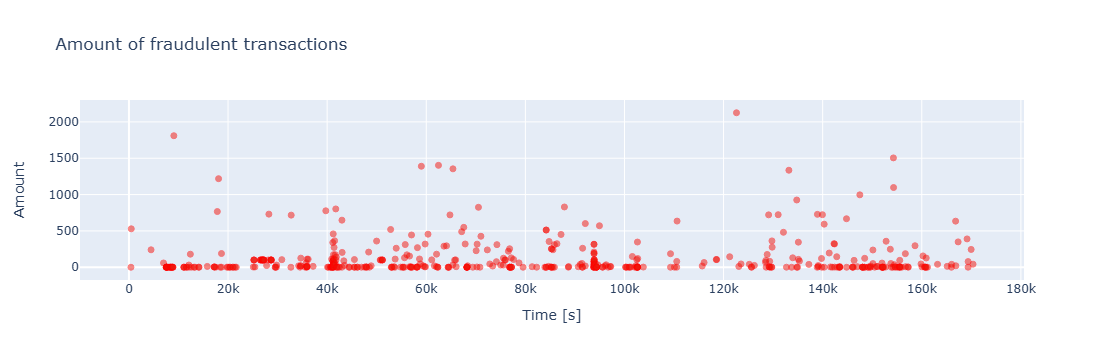

In [204]:
# Select rows where 'Class' is 1 (fraudulent transactions)
fraud = df.loc[df['Class'] == 1]

# Define a Scatter trace for Plotly
trace = go.Scatter(
    x=fraud['Time'],  # X-axis values from the 'Time' column of fraudulent transactions
    y=fraud['Amount'],  # Y-axis values from the 'Amount' column of fraudulent transactions
    name="Amount",  # Trace name
    marker=dict(
        color='rgb(238,23,11)',  # Marker color
        line=dict(
            color='red',  # Marker border color
            width=1),  # Marker border width
        opacity=0.5),  # Marker opacity
    text=fraud['Amount'],  # Text to be displayed on hover
    mode="markers"  # Display mode (markers only)
)

# Combine the trace into a list
data = [trace]

# Define layout for the plot
layout = dict(
    title='Amount of fraudulent transactions',  # Plot title
    xaxis=dict(title='Time [s]', showticklabels=True),  # X-axis label and tick settings
    yaxis=dict(title='Amount'),  # Y-axis label
    hovermode='closest'  # Hover mode
)

# Combine data and layout into a dictionary representing the figure
fig = dict(data=data, layout=layout)

# Plot the figure using Plotly
iplot(fig, filename='fraud-amount')


<a id='4.7'></a>
# 4.7: Features Correlation
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">

<b>Heatmaps</b>
<p>A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. It's a great way to visualize data in a 2D format, especially when dealing with large datasets.</p>

Here are some key points about heatmaps:

- <b>1. Color Representation:</b> In a heatmap, each cell in the matrix is assigned a color based on its value. Typically, a gradient of colors is used to represent the range of values, with lighter colors representing lower values and darker colors representing higher values.

- <b>2. Applications:</b> Heatmaps are commonly used in various fields such as data analysis, biology, finance, and geography. They can be used to visualize correlation matrices, spatial data, density plots, and more.

- <b>3. Data Aggregation:</b> Heatmaps often involve aggregating data into bins or cells. This aggregation can be done using methods like histograms, kernel density estimation, or simply dividing the data space into a grid.

- <b>4. Interpretation:</b> Heatmaps make it easy to identify patterns and trends in the data. They allow you to quickly spot areas of high or low concentration, clusters, and outliers.
  
- <b>5. Colormaps:</b> choosing an appropriate colormap is crucial for effective visualization. Colormaps can be sequential (e.g., from light to dark), diverging (e.g., with a distinct midpoint), or qualitative (e.g., with distinct colors for categories). It's important to select a colormap that is perceptually uniform and suitable for the type of data being visualized.

- <b>6. Normalization:</b> Depending on the data, normalization may be necessary to ensure that the color mapping accurately represents the underlying values. Common normalization methods include linear scaling, logarithmic scaling, and z-score normalization.

- <b>7. Software:</b> Many software libraries and tools support the creation of heatmaps, including Python libraries like Matplotlib, Seaborn, and Plotly, as well as dedicated heatmap visualization software.

<p>Overall, heatmaps are a powerful tool for visualizing data distributions, relationships, and patterns, providing insights that may not be immediately apparent from raw data alone.</p>

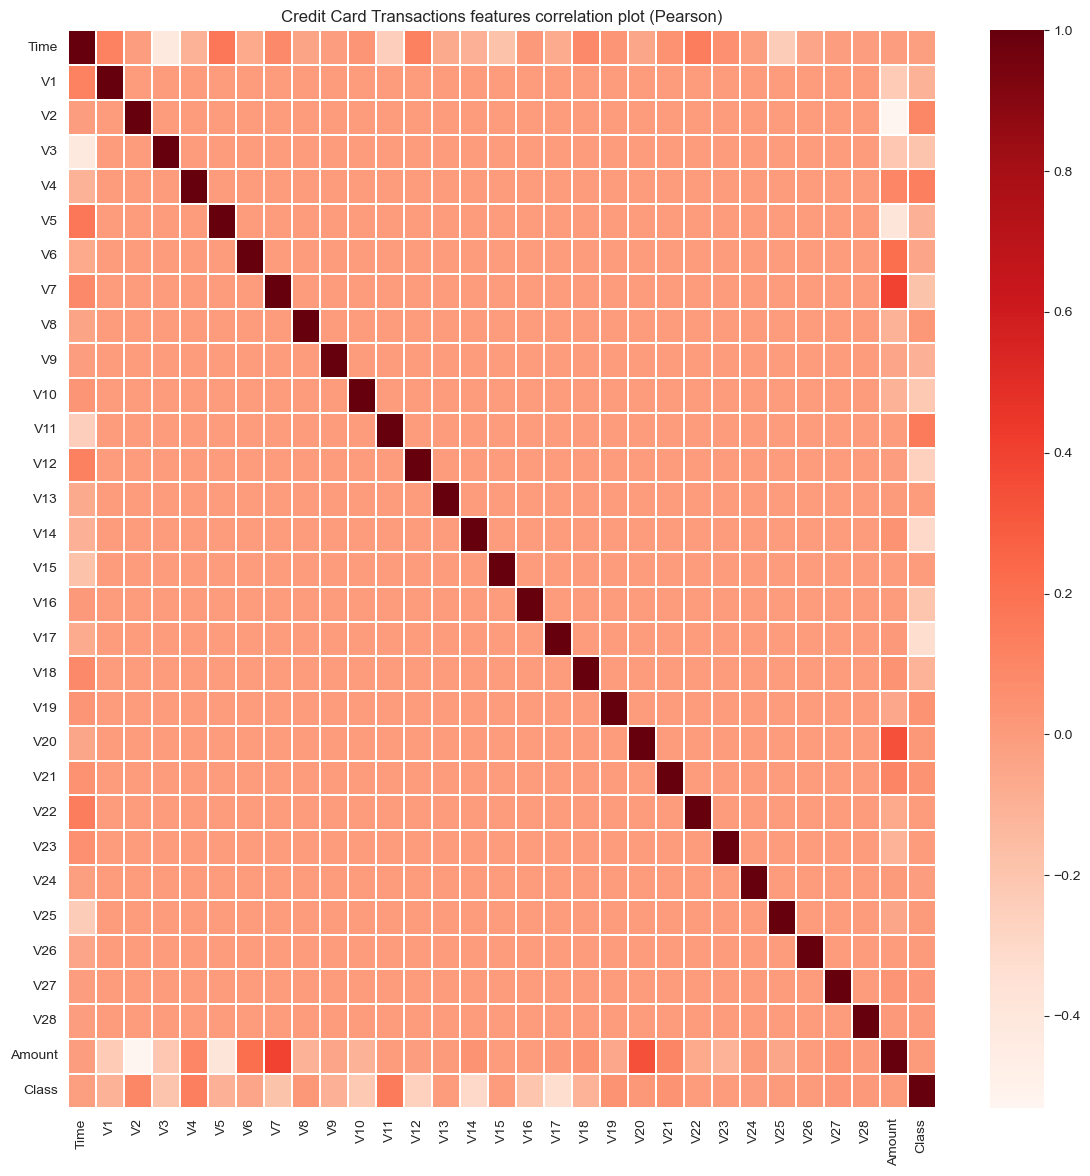

In [205]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

<p>As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).</p>

* Let's plot the correlated and inverse correlated values on the same graph.

* Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

<a id='4.8'></a>
# 4.8: LMPlot
⤴️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 20px;">

<p> <b>lmplot</b> is a function in Seaborn used to create scatter plots with regression lines. It's helpful for visualizing the relationship between two variables and assessing their association. With parameters like x and y for defining variables, data for the dataset, and options like hue, col, and row for subsetting and coloring, lmplot provides a versatile way to explore relationships in your data. It fits a linear regression model to the data and plots the resulting regression line along with confidence intervals. It also supports facets, allowing multiple subsets of the data to be visualized separately. Overall, lmplot is a powerful tool for visualizing linear relationships in your data.</p>

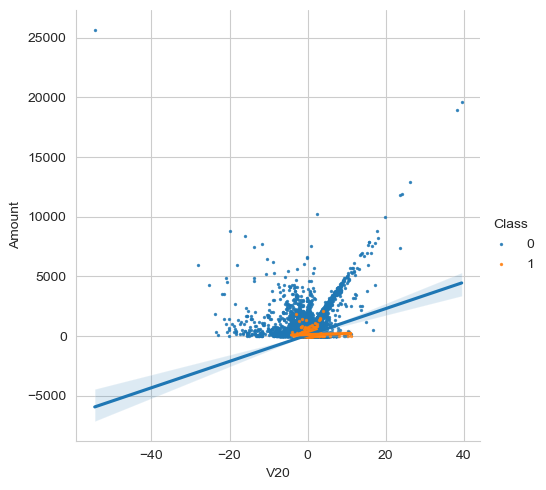

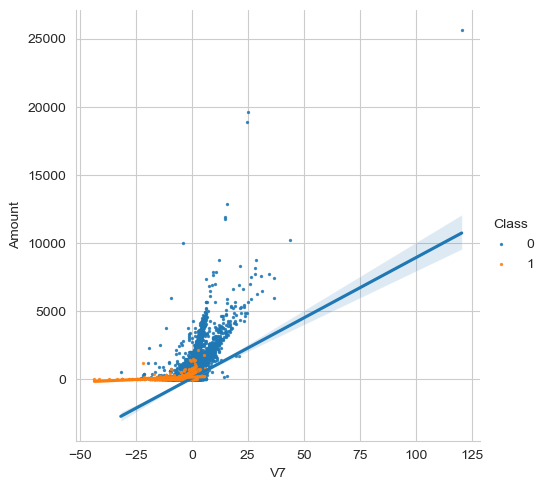

In [206]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

* **We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).**

**Let's plot now the inverse correlated values.**

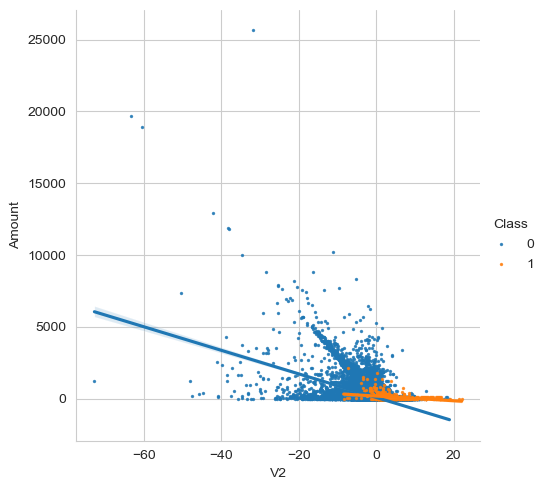

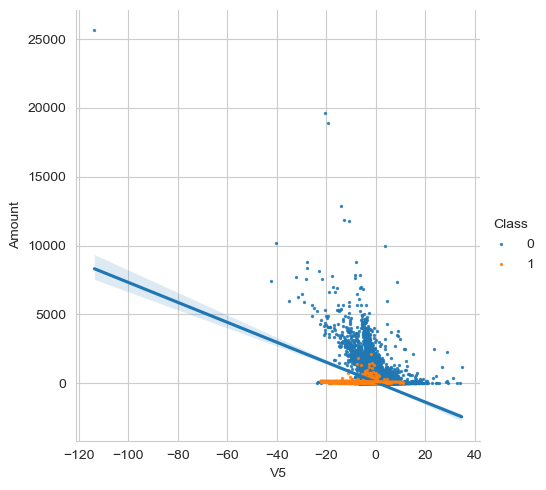

In [207]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

**We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).**

<a id='4.9'></a>
# 4.9: Features density plot
⤴️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 20px;">
<b>KDE Plot</b>
<p>A KDE plot, or Kernel Density Estimate plot, is a type of data visualization that provides a smooth estimate of the probability density function of a continuous variable. It's often used to visualize the distribution of data and can be particularly useful for comparing distributions across different groups or categories. In the provided code snippet, KDE plots are used to visualize the distribution of each feature in the dataset separately for two different classes (Class = 0 and Class = 1). This allows for easy comparison of the distributions between the two classes.</p>

<Figure size 640x480 with 0 Axes>

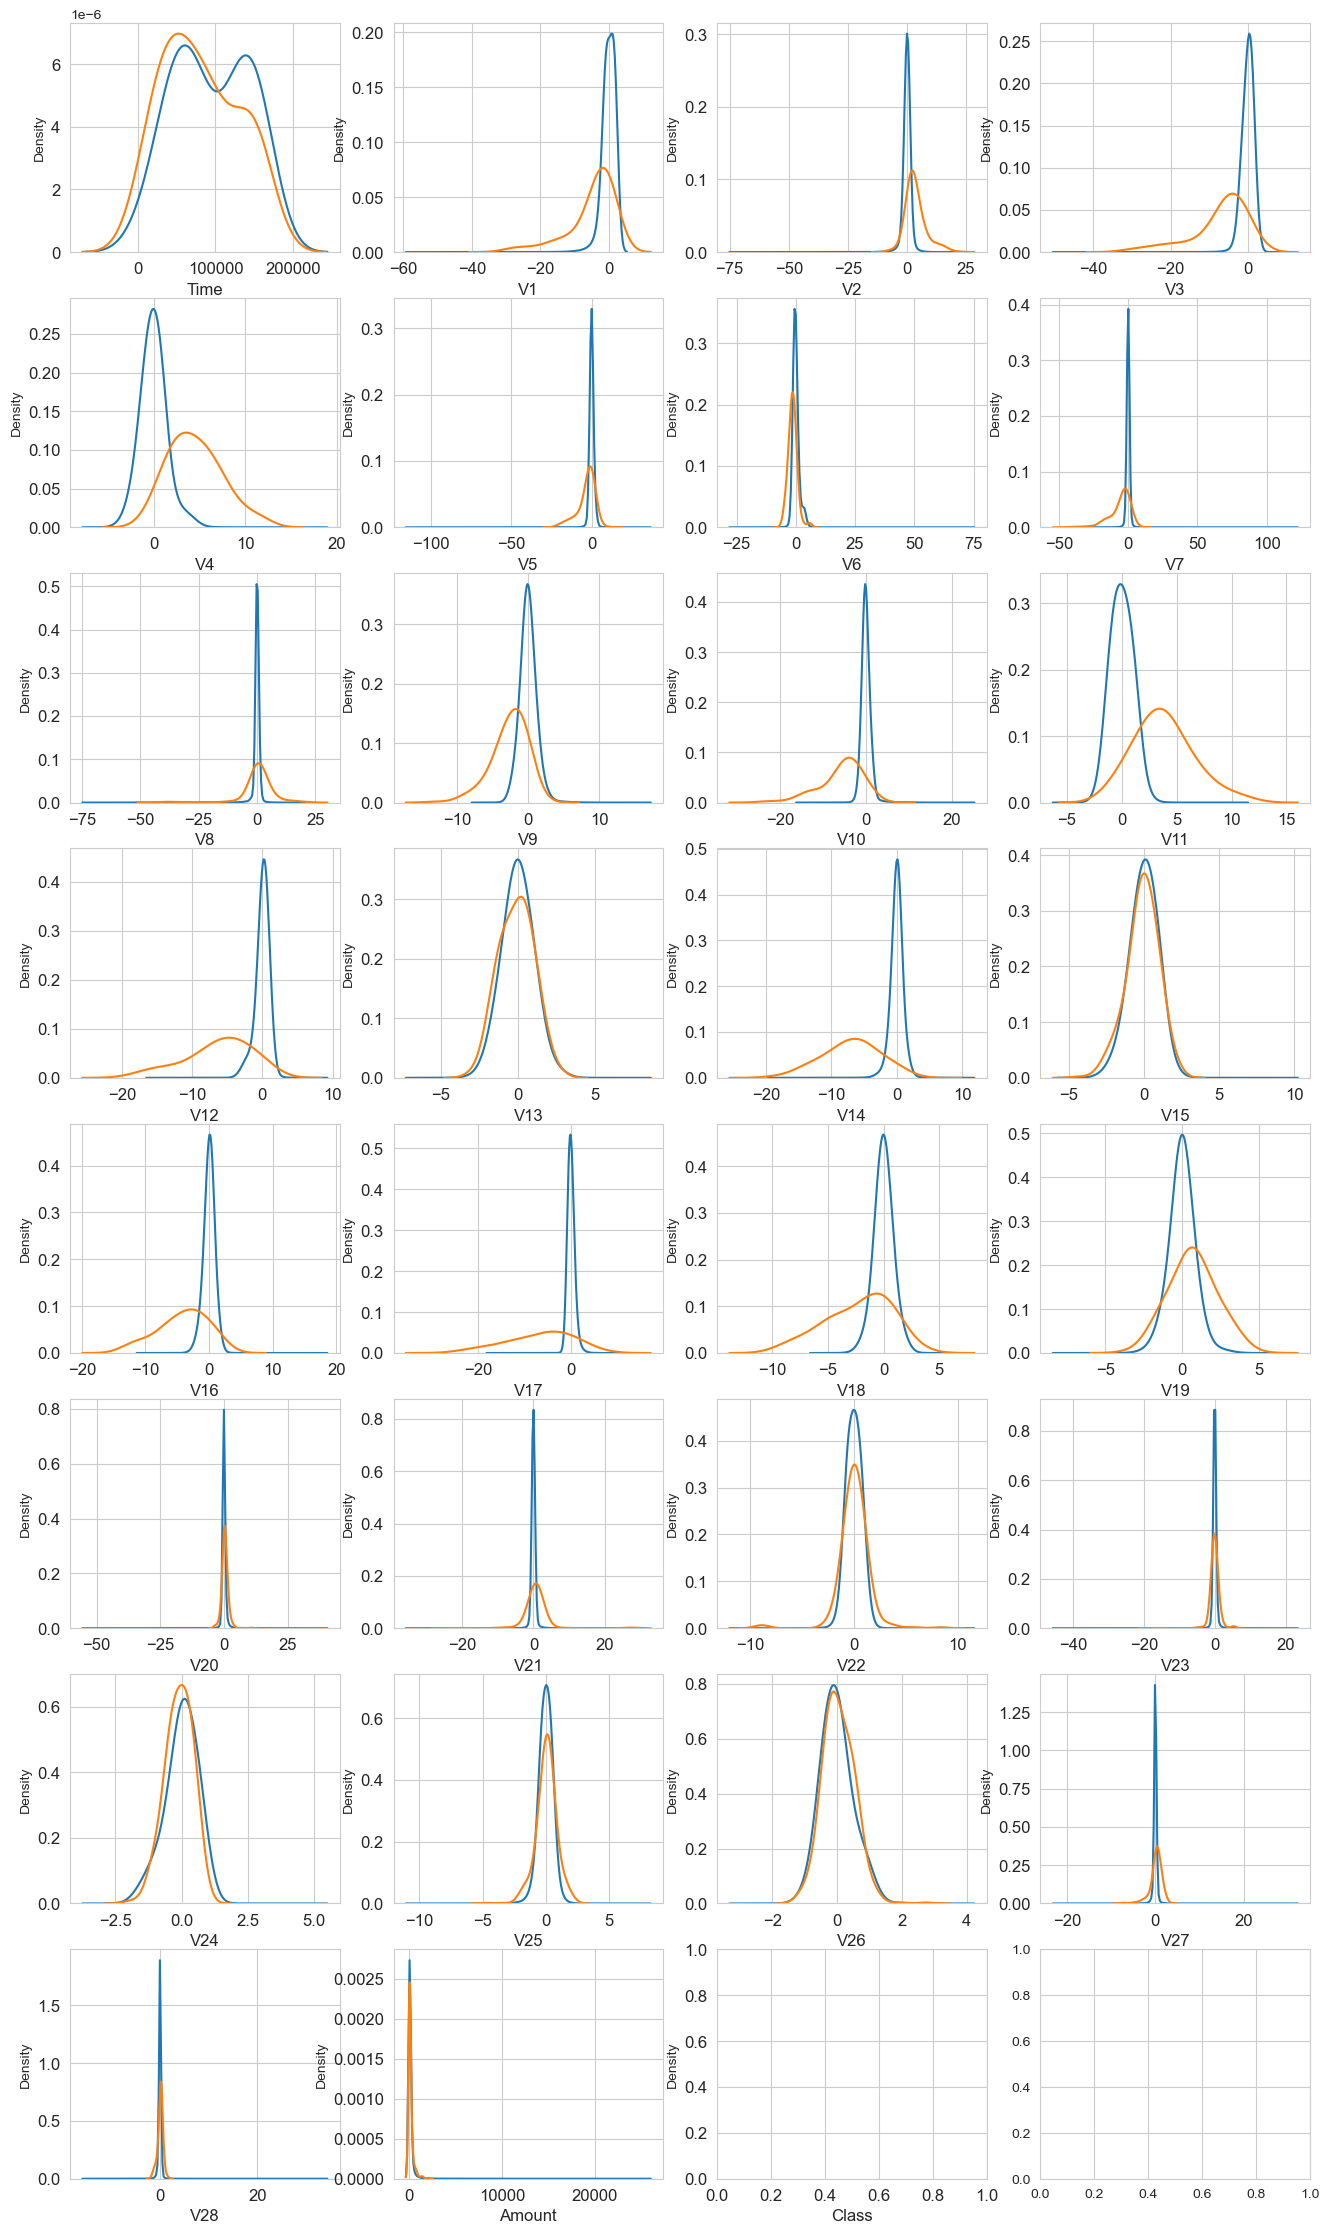

In [208]:
# Extracting column names
var = df.columns.values

# Initializing variables and splitting data based on class
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

# Setting plot style and creating a figure
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

# Looping through each feature
for feature in var:
    i += 1
    plt.subplot(8, 4, i)
    
    # Plotting Kernel Density Estimates for each class
    sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
     # Adding labels and formatting
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show();

* **For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.**

* **In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.**

<a id='5'></a>
# 5: Predictive Models
⤴️[Table Contents](#table_content)

* **Define predictors and target values**

* **Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.**

In [82]:
X = df.drop("Class", axis=1)
y = df['Class']

In [84]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

<a id='5.1'></a>
# 5.1: Train Test Split
⤴️[Table Contents](#table_content)

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [86]:
y_train.value_counts()

Class
0    199008
1       356
Name: count, dtype: int64

<a id='5.2'></a>
# 5.2: Balanced Data using Over-sampling Technique
⤴️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 20px;">
<b>SMOTE</b>, which stands for Synthetic Minority <b>Over-sampling Technique</b>, is a popular method used in machine learning to address the issue of <b>class imbalance</b> in datasets. Class imbalance occurs when one class (typically the positive class) is underrepresented compared to other classes (typically the negative class), which can lead to biased model performance. Here’s an explanation of how <b>SMOTE</b> works and why it's useful:

<b>SMOTE Working</b>
- <b>1. Identify Minority Samples:</b> SMOTE begins by identifying the samples in the minority class.

- <b>2. Random Sampling of Minority Class:</b> For each minority class sample, SMOTE selects one or more of its k-nearest neighbors (usually 5 nearest neighbors) based on Euclidean distance.

- <b>3. Create Synthetic Samples:</b> New synthetic samples are generated by interpolating between the selected minority sample and its nearest neighbors. This is done by randomly choosing a point along the line segment that joins the minority sample with its neighbor.
  
* For a minority sample `𝑥𝑖` and one of its neighbors `𝑥𝑧𝑖`, a new synthetic sample `𝑥𝑛𝑒𝑤` is created as follows:<br>
                    <b>`𝑥𝑛𝑒𝑤 = 𝑥𝑖 + 𝜆⋅(𝑥𝑧𝑖 − 𝑥𝑖)`</b><br>
                    where `𝜆` is a random number between 0 and 1.
  
* <b>4. Repeat Process:</b> This process is repeated for a specified number of synthetic samples until the desired balance between classes is achieved.

In [87]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [88]:
y_train.value_counts()

Class
0    199008
1    199008
Name: count, dtype: int64

<a id='6'></a>
# 6: Logistic regression Model
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h2>Logistic Regression: </h3>
    
#### Introduction

* Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes. It is a type of regression analysis where the dependent variable is categorical.

#### How Logistic Regression Works

* Logistic Regression models the probability that a given input belongs to a particular class. Instead of predicting the value of a dependent variable directly, Logistic Regression predicts the probability of the variable belonging to a particular class.
   * <b>Linear Relationship:</b> Initially, Logistic Regression models a linear relationship between the input features and the log-odds of the outcome. The log-odds (logit) function is defined as:
        *  `logit(p)=ln(p / 1−p)`<br>
           where 𝑝 is the probability of the outcome of interest.
   * <b>Sigmoid Function:</b> The linear model is then transformed using the sigmoid function to ensure that the predicted probabilities lie between 0 and 1. The sigmoid function is defined as:
        *  `σ(z)= 1 / 1+e−z`<br>
        where 𝑧 is the linear combination of input features.
   * <b>Probability Prediction:</b> The output of the sigmoid function is interpreted as the probability of the outcome of interest. For binary classification, the model predicts the class label based on a threshold (commonly 0.5).


In [89]:
model_LR = LogisticRegression()

In [90]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_test_lrpred = model_LR.predict(X_test)

<a id='6.1'></a>
## 6.1: Model Scores
⤴️[Table Contents](#table_content)

In [157]:
print("Logistic Regression Classification Model Scores: \n")
lr_accuracy = accuracy_score(y_test_lrpred,y_test)
lr_recall = recall_score(y_test_lrpred,y_test)
lr_f1 = f1_score(y_test_lrpred,y_test)
lr_roc_auc = roc_auc_score(y_test_lrpred,y_test)

print('Accuracy  : ',lr_accuracy,)
print('Recall    : ',lr_recall)
print("F1        : ",lr_f1)
print("Auc Score : ",lr_roc_auc)

Logistic Regression Classification Model Scores: 

Accuracy  :  0.9763266789360779
Recall    :  0.9835653933119124
F1        :  0.97614815427225
Auc Score :  0.976433440442337


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b>Logistic Regression</b> Model we get <b>97%</b> of <b>accuracy score</b> which is best score, so there is no need to perform <b>HyperParameter Tunning </b>or any <b>scaling</b> techniques required right here</p>

<a id='6.2'></a>
## 6.2: Feature Importance
⤴️[Table Contents](#table_content)

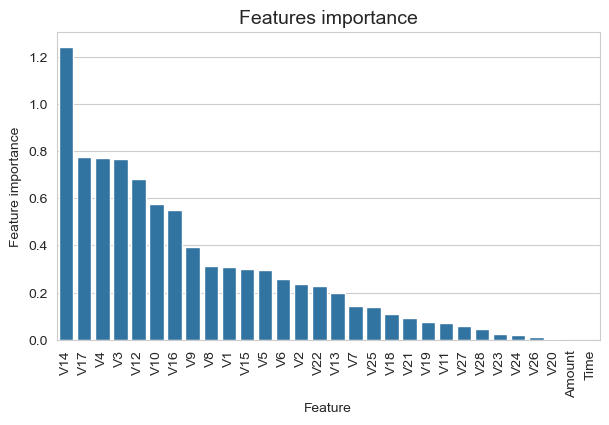

In [93]:
feature_importance = np.abs(model_LR.coef_[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': feature_importance})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

* The most important features are <b>V14,V17,V4,V3,V12,V10</b> and <b>V16</b>

<a id='6.3'></a>
## 6.3: Confusion Matrix
⤴️[Table Contents](#table_content)

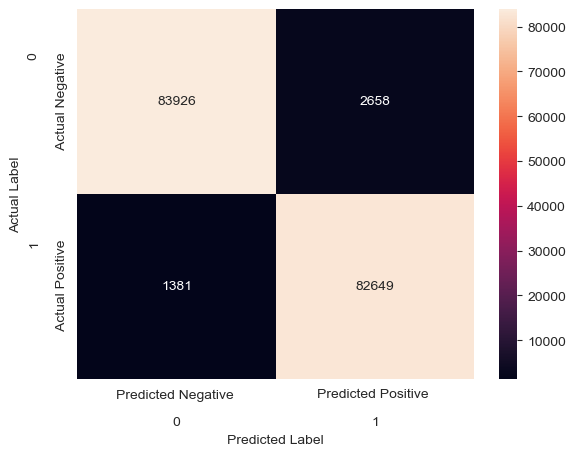

In [94]:
sns.heatmap(confusion_matrix(y_test_lrpred,y_test),annot=True,fmt='d',xticklabels=['Predicted Negative \n\n0', 'Predicted Positive \n\n1'], 
            yticklabels=['0\n\n Actual Negative', '1\n\n Actual Positive'])

# Add labels to the axes
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

- 11 means <b>(True Positive)</b>
- 00 means <b>(True Negative)</b>
- 01 means <b>(False Positive)</b>
- 10 means <b>(False Negative)</b>


  - In this Logistic Regression Confusion Matrix plot show maximum values in the <b>True Postive</b> and in <b>True Negative</b> State which is a good sign 

<a id='6.4'></a>
## 6.4: (ROC) Curve
⤴️[Table Contents](#table_content)

In [95]:
def roc_curv(model, X_train, y_train, X_test, y_test,):
    # ROC Curve and AUC for Test Data
    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (test data) (area = {roc_auc_test:.2f})')
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (train data) (area = {roc_auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

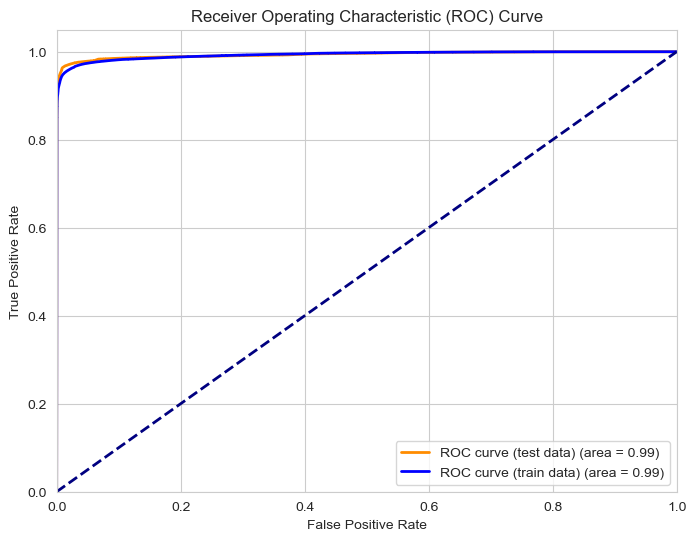

In [96]:
roc_curv(model_LR, X_train, y_train, X_test, y_test)

<a id='7'></a>
# 7: Random Forest Classification Model
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">

<b>Define model parameters</b>
<p>The Random Forest Classifier is a versatile and widely-used machine learning algorithm. It operates by constructing a multitude of decision trees during training and outputs the mode (or mean) prediction of the individual trees for classification (or regression) tasks. Here are some key points:</p>

- <b>1. Ensemble Learning:</b> Random Forest belongs to the family of ensemble learning methods where multiple models are trained to solve the same problem and their predictions are aggregated to improve the overall performance.

- <b>2. Decision Trees:</b> Each decision tree in a Random Forest is trained on a random subset of the training data and a random subset of features. This randomness helps to prevent overfitting and improves generalization.

- <b>3. Bagging:</b> Random Forest employs a technique called bagging (Bootstrap Aggregating), where each tree is trained on a bootstrap sample of the data, meaning that each tree is trained on a random sample with replacement from the original dataset.

- <b>4. Predictions:</b> In classification tasks, the final prediction of the Random Forest is made by taking a majority vote among the predictions of individual trees. In regression tasks, the final prediction is typically the mean of the predictions of individual trees.

- <b>5. Feature Importance:</b> Random Forest can provide estimates of feature importance, which indicates the relative importance of each feature in predicting the target variable. This can be useful for feature selection and understanding the underlying relationships in the data.

- <b>6. Robustness:</b> Random Forest is robust to noise and outliers in the data and typically performs well without extensive hyperparameter tuning.

- <b>7. Applications:</b> Random Forest is widely used in various fields such as finance, healthcare, and bioinformatics for tasks such as classification, regression, and feature selection.

<p>Overall, Random Forest is a powerful and flexible algorithm that is well-suited for a wide range of machine learning tasks, especially when working with complex datasets with many features.</p>

<p>Then Let's set the parameters for the model.</p>

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

RandomForestClassifier()

In [98]:
#Running the model on the test dataset
y_test_rfpred = rfmodel.predict(X_test)

<a id='7.1'></a>
## 7.1: Model Scores
⤴️[Table Contents](#table_content)

In [106]:
print("Random forest Classification Model Scores: \n")
rfmodel_accuracy = accuracy_score(y_test_rfpred,y_test)
rfmodel_recall = recall_score(y_test_rfpred,y_test)
rfmodel_f1 = f1_score(y_test_rfpred,y_test)
rfmodel_roc_auc = roc_auc_score(y_test_rfpred,y_test)
print('Accuracy  : ',rfmodel_accuracy)
print('Recall    : ',rfmodel_recall)
print("F1        : ",rfmodel_f1)
print("Auc_Score : ",rfmodel_roc_auc)

Random forest Classification Model Scores: 

Accuracy  :  0.9714150069748086
Recall    :  0.9996769463979523
F1        :  0.9705830905548619
Auc_Score :  0.9729279419781001


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b>Random Forest Classifier</b> Model we get <b>97%</b> of <b>accuracy score</b> which is best score, so there is no need to perform <b>HyperParameter Tunning</b> or any <b>Scaling</b> techniques required right here</p>

<a id='7.2'></a>
## 7.2: Feature Importance
⤴️[Table Contents](#table_content)

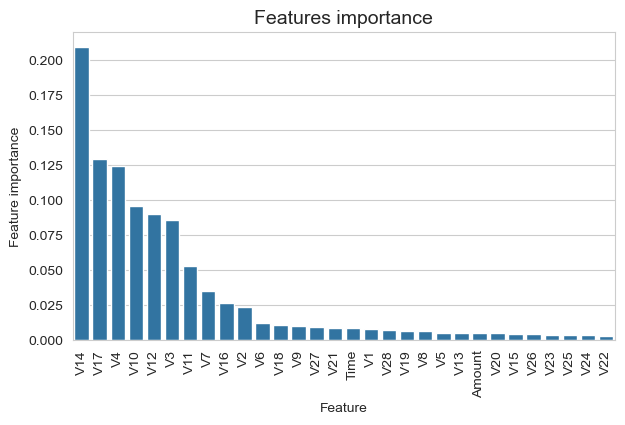

In [100]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfmodel.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

* The most important features are <b>V14,V17,V4,V10,V12</b> and <b>V3</b>

<a id='7.3'></a>
## 7.3: Confusion Matrix
⤴️[Table Contents](#table_content)

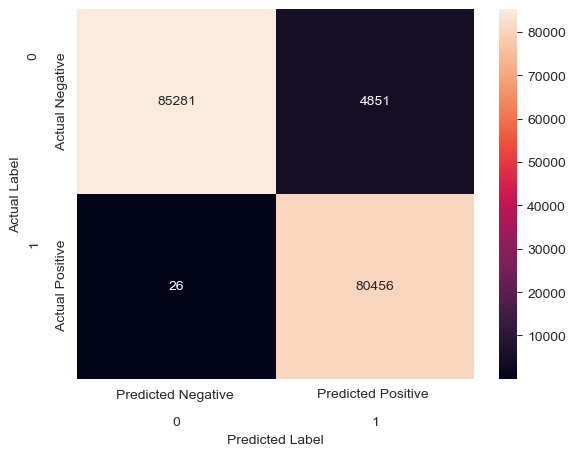

In [101]:
sns.heatmap(confusion_matrix(y_test_rfpred,y_test),annot=True,fmt='d',xticklabels=['Predicted Negative \n\n0', 'Predicted Positive \n\n1'], 
            yticklabels=['0\n\n Actual Negative', '1\n\n Actual Positive'])

# Add labels to the axes
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

- 11 means <b>(True Positive)</b>
- 00 means <b>(True Negative)</b>
- 01 means <b>(False Positive)</b>
- 10 means <b>(False Negative)</b>


  - In this Random Forest Classifier Confusion Matrix plot show maximum values in the <b>True Postive</b> and in <b>True Negative</b> State which is a good sign 

<a id='7.4'></a>
## 7.4: (ROC) Curv
⤴️[Table Contents](#table_content)

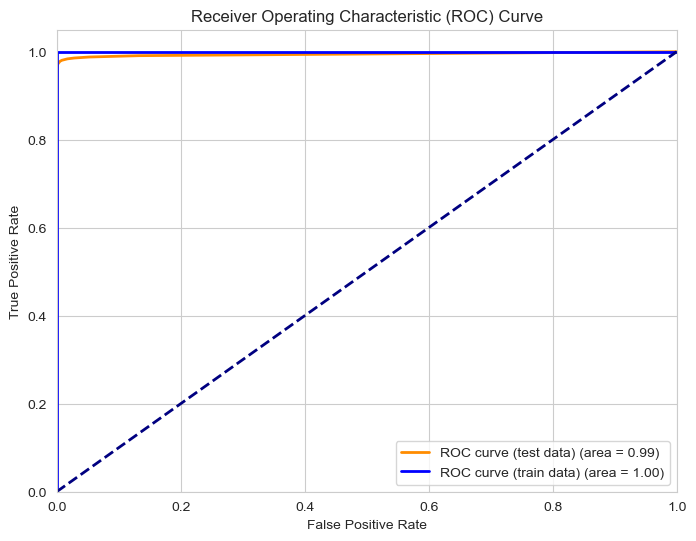

In [102]:
roc_curv(rfmodel, X_train, y_train, X_test, y_test)

<a id='8'></a>
# 8: XGboost Classifier
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3> XGBoost Classifier: </h3>
    
#### Introduction

* <b>XGBoost</b> (eXtreme Gradient Boosting) is a powerful and scalable machine learning algorithm that has been widely used in various data science competitions and real-world applications. It belongs to the family of gradient boosting algorithms, which build an ensemble of weak learners (typically decision trees) to create a strong predictive model.

In [103]:
# create an XG Boost classifier
xgb_clf = xgb.XGBClassifier()

# Fit and predict from the model
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
# lets do the predictions
y_test_xgpred = xgb_clf.predict(X_test)

<a id='8.1'></a>
## 8.1: Model scores
⤴️[Table Contents](#table_content)

In [107]:
print("XGBoost Classification Model Scores: \n")
xgb_accuracy = accuracy_score(y_test_xgpred,y_test)
xgb_recall = recall_score(y_test_xgpred,y_test)
xgb_f1 = f1_score(y_test_xgpred,y_test)
xgb_roc_auc = roc_auc_score(y_test_xgpred,y_test)
print('Accuracy   : ',xgb_accuracy)
print('Recall     : ',xgb_recall)
print("F1         : ",xgb_f1)
print("Auc_Score  : ",xgb_roc_auc)

XGBoost Classification Model Scores: 

Accuracy   :  0.9774051367414163
Recall     :  0.9994971422964652
F1         :  0.9768941686995403
Auc_Score  :  0.9783408477535313


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b>XGBoost Classifier</b> Model we get <b>97%</b> of <b>accuracy score</b> which is best score, so there is no need to perform <b>HyperParameter Tunning</b> or any <b>scaling</b> techniques right here</p>

<a id='8.2'></a>
## 8.2: Feature Importance
⤴️[Table Contents](#table_content)

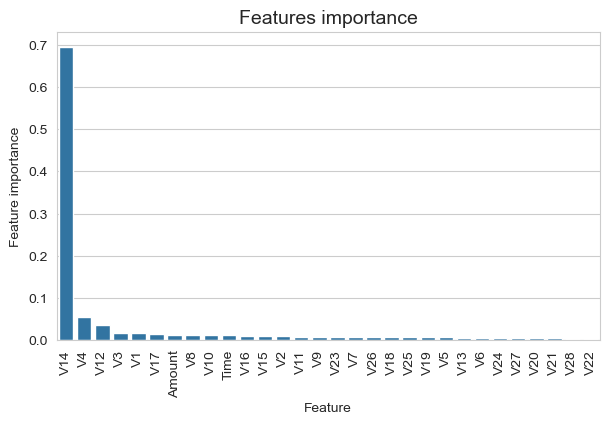

In [108]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': xgb_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

* The most important features are <b>V14</b>

<a id='8.3'></a>
## 8.3: Confusion Matrix
⤴️[Table Contents](#table_content)

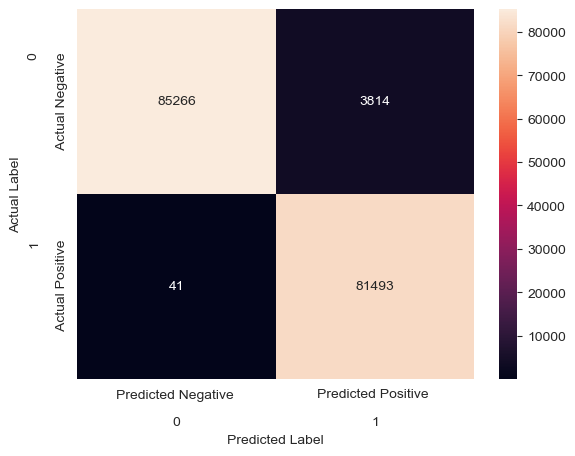

In [109]:
sns.heatmap(confusion_matrix(y_test_xgpred,y_test),annot=True,fmt='d',xticklabels=['Predicted Negative \n\n0', 'Predicted Positive \n\n1'], 
            yticklabels=['0\n\n Actual Negative', '1\n\n Actual Positive'])

# Add labels to the axes
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

- 11 means <b>(True Positive)</b>
- 00 means <b>(True Negative)</b>
- 01 means <b>(False Positive)</b>
- 10 means <b>(False Negative)</b>

  - In this XGBoost Classifier Confusion Matrix plot show maximum values in the <b>True Postive</b> and in <b>True Negative</b> State which is a good sign 

<a id='8.4'></a>
## 8.4: (ROC) Curv
⤴️[Table Contents](#table_content)

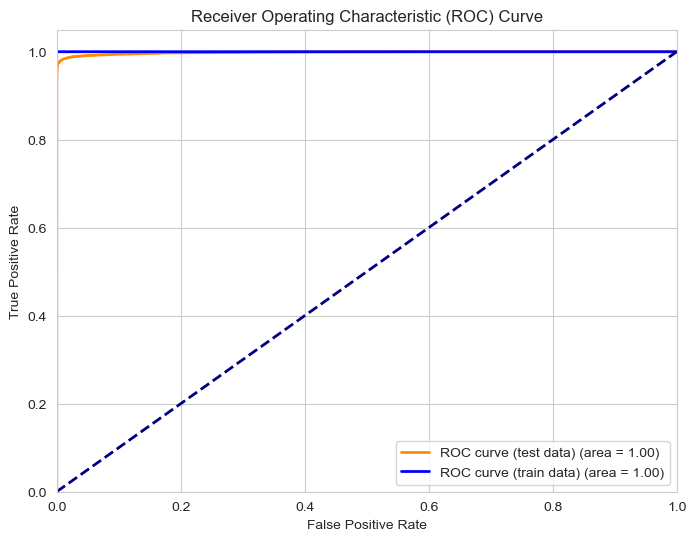

In [110]:
roc_curv(xgb_clf, X_train, y_train, X_test, y_test)

<a id='9'></a>
# 9: Decision Tree Classifier Model
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3> Decision Tree Classifier: </h3>

#### Introduction

* A<b> Decision Tree</b> is a versatile machine learning algorithm capable of performing both classification and regression tasks. It is easy to interpret, understand, and use, making it a popular choice for various predictive modeling tasks.

* <b>Tree Structure:</b> A decision tree consists of nodes that form a tree-like structure. The topmost node is called the root node, and it splits into branches leading to child nodes. Each internal node represents a "test" or "decision" on a feature, and each leaf node represents an outcome (class label or value).

In [111]:
#Applying Decision Tree Classifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [112]:
# lets do the predictions
y_test_dtpred = dtmodel.predict(X_test)

<a id='9.1'></a>
## 9.1: Model Scores
⤴️[Table Contents](#table_content)

In [113]:
#Using accuracy score we are checking the accuracy on the testing dataset
print('Decision Tree Classifier Scores : \n')
dt_accuracy = accuracy_score(y_test_dtpred,y_test)
dt_recall = recall_score(y_test_dtpred,y_test)
dt_f1 = f1_score(y_test_dtpred,y_test)
dt_roc_auc = roc_auc_score(y_test_dtpred,y_test)
print('Accuracy  : ',dt_accuracy)
print('Recall    : ',dt_recall)
print("F1 score  : ",dt_f1)
print("Auc_Score : ",dt_roc_auc)

Decision Tree Classifier Scores : 

Accuracy  :  0.9577408653451651
Recall    :  0.9978072691577109
F1 score  :  0.9559689278647678
Auc_Score :  0.9607254262098103


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b> Decision Tree Classifier</b> Model we get <b>95%</b> of <b>accuracy score</b> which is best score, so there is no need to perform <b>HyperParameter Tunning</b> or any <b>scaling</b> techniques right here</p>

<a id='9.2'></a>
## 9.2: Feature Importance
⤴️[Table Contents](#table_content)

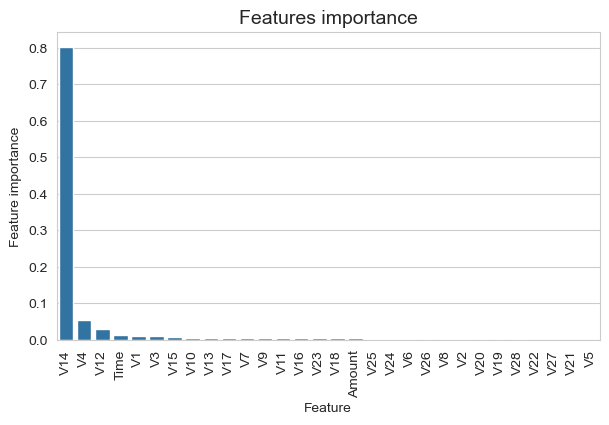

In [114]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': dtmodel.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

* The most important features is <b>V14</b>

<a id='9.3'></a>
## 9.3: Confusion matrix
⤴️[Table Contents](#table_content)

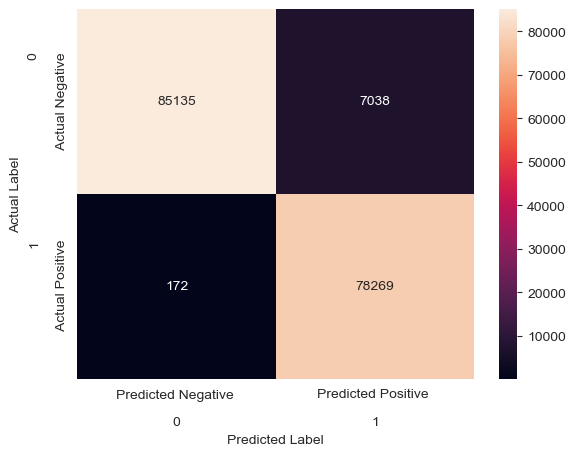

In [115]:
sns.heatmap(confusion_matrix(y_test_dtpred,y_test),annot=True,fmt='d',xticklabels=['Predicted Negative \n\n0', 'Predicted Positive \n\n1'], 
            yticklabels=['0\n\n Actual Negative', '1\n\n Actual Positive'])

# Add labels to the axes
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

- 11 means <b>(True Positive)</b>
- 00 means <b>(True Negative)</b>
- 01 means <b>(False Positive)</b>
- 10 means <b>(False Negative)</b>

  - In this Decision Tree Confusion Matrix plot show maximum values in the <b>True Postive</b> and in <b>True Negative</b> State which is a good sign 

<a id='9.4'></a>
## 9.4: (ROC) Curv
⤴️[Table Contents](#table_content)

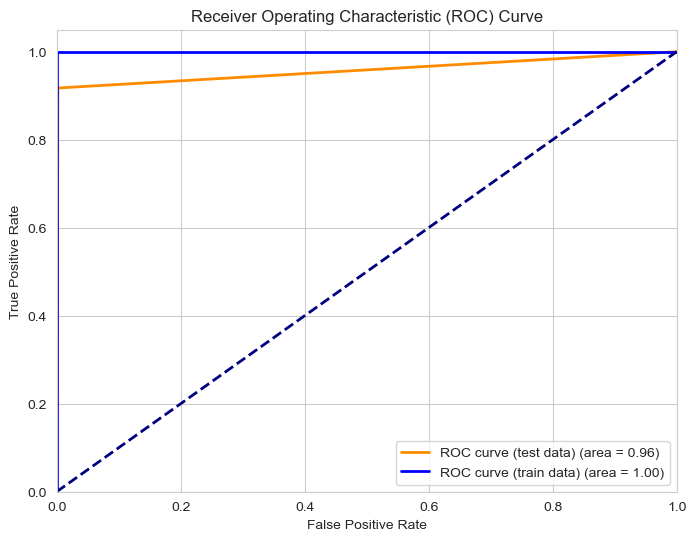

In [116]:
roc_curv(dtmodel, X_train, y_train, X_test, y_test)

<a id='9.5'></a>
# 9.5: Decision Tree Graph
⤴️[Table Contents](#table_content)

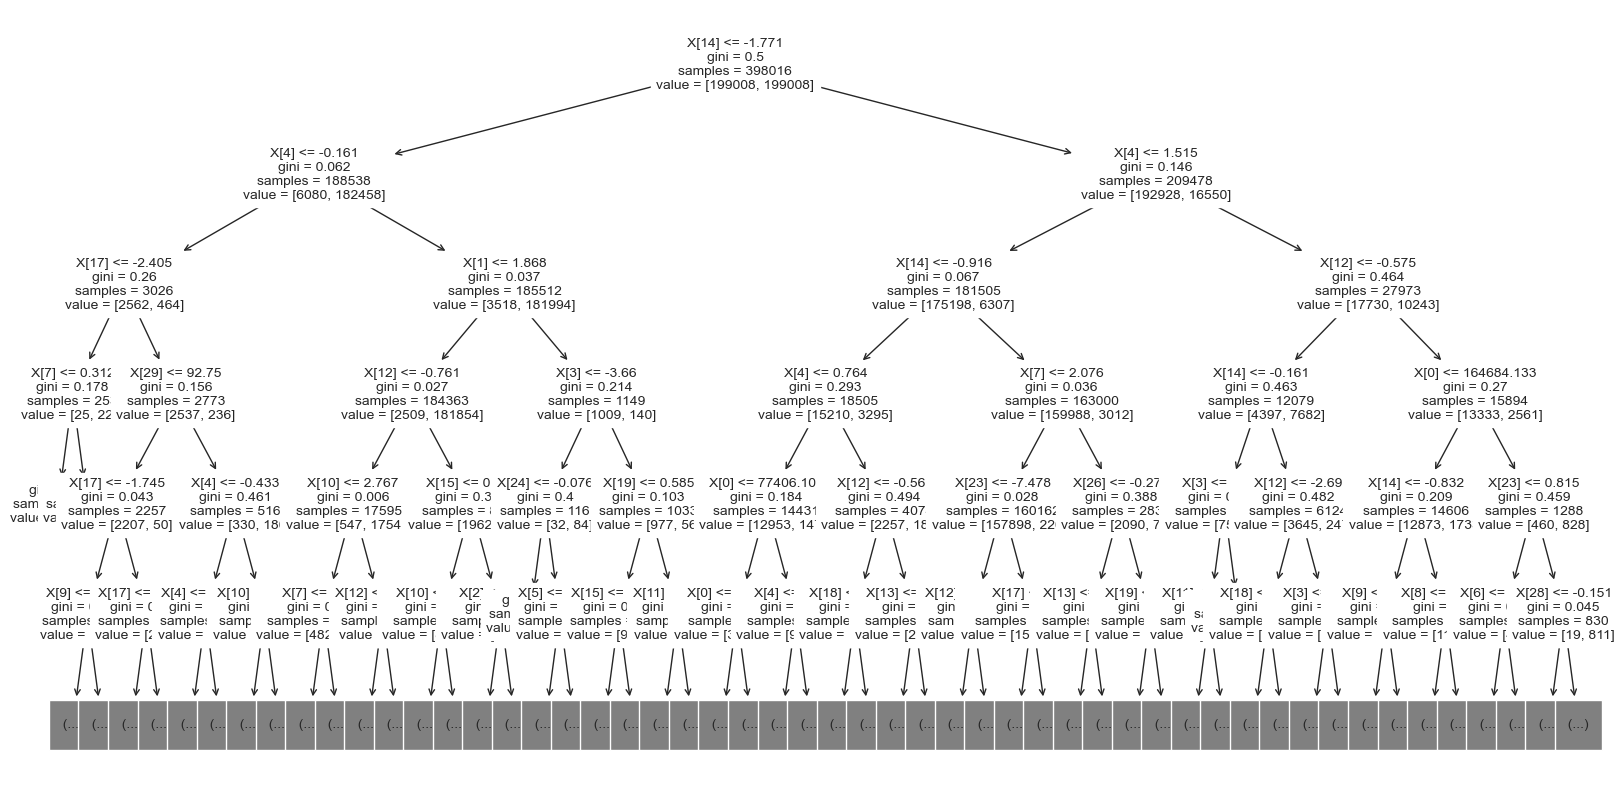

In [117]:
from sklearn import tree

plt.figure(figsize=(20, 10))

tree.plot_tree(dtmodel,max_depth=5,fontsize=10)

plt.show()

<a id='10'></a>
# 10: Naive Bayes Classifier Model
⤴️[Table Contents](#table_content)

<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Naive Bayes Classifier: An Explanation</h3>

#### Introduction :

* Naive Bayes is a family of simple yet effective probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Despite its simplicity, Naive Bayes can perform surprisingly well and is often used in text classification, spam filtering, and other applications.

#### How Naive Bayes Works :

* Bayes' Theorem: Naive Bayes classifiers apply Bayes' theorem to compute the probability of a class given a feature vector (input data). Bayes' theorem is formulated as:
   * `P(y∣X)= P(X∣y)⋅P(y) / P(X)`<br>
    where:
    * 𝑃(𝑦∣𝑋) is the posterior probability of class 𝑦 given the feature vector 𝑋.
    * 𝑃(𝑋∣𝑦) is the likelihood of the feature vector 𝑋 given class 𝑦.
    * 𝑃(𝑦) is the prior probability of class 𝑦.
    * 𝑃(𝑋) is the probability of the feature vector 𝑋.

In [118]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [119]:
y_test_nbpred = gnb.predict(X_test)

In [120]:
#Using accuracy score we are checking the accuracy on the testing dataset
print('Naive Bayes Classifier Scores: \n')
gnb_accuracy = accuracy_score(y_test_nbpred,y_test)
gnb_recall = recall_score(y_test_nbpred,y_test)
gnb_f1 = f1_score(y_test_nbpred,y_test)
gnb_roc_auc = roc_auc_score(y_test_nbpred,y_test)
print('Accuracy    : ',gnb_accuracy)
print('Recall      : ',gnb_recall)
print("F1 Score    : ",gnb_f1)
print("Auc_Score   : ",gnb_roc_auc)

Naive Bayes Classifier Scores: 

Accuracy    :  0.8798574560118162
Recall      :  0.9906873211284241
F1 Score    :  0.8645619970134658
Auc_Score   :  0.9002779182739897


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b>Naive Bayes Classifier</b> Model we get <b>87%</b> of <b>accuracy score</b> which is Not as much good score, so in this case we should have to perform First <b>Scaling</b> then if required we perform <b>HyperParameter Tunning</b> right here for increasing best score</p>

<a id='10.1'></a>
# 10.1: Standard Scaling
⤴️[Table Contents](#table_content)

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [134]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [135]:
y_test_nbpred_scaled = gnb.predict(X_test_scaled)

In [136]:
#Using accuracy score we are checking the accuracy on the testing dataset
print('Naive Bayes Classifier After Standard Scaling Scores: \n')
gnb_accuracy_scaled = accuracy_score(y_test_nbpred_scaled,y_test)
gnb_recall_scaled = recall_score(y_test_nbpred_scaled,y_test)
gnb_f1_scaled = f1_score(y_test_nbpred_scaled,y_test)
gnb_roc_auc_scaled = roc_auc_score(y_test_nbpred_scaled,y_test)
print('Accuracy    : ',gnb_accuracy)
print('Recall      : ',gnb_recall)
print("F1 Score    : ",gnb_f1)
print("Auc_Score   : ",gnb_roc_auc)

Naive Bayes Classifier After Standard Scaling Scores: 

Accuracy    :  0.928118442800708
Recall      :  0.9826608693353773
F1 Score    :  0.9238137835923814
Auc_Score   :  0.9336561532264636


* **Now Performing Hyperparameter Tuning for increasing Accuracy Score**

<a id='10.2'></a>
## 10.2: Hyperparameter tuning using GridSearchCV
⤴️[Table Contents](#table_content)

In [125]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100) 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best estimator
best_gnb = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 1.873817422860383e-05}
Best Score: 0.9209855890599272


In [139]:
# Get the best estimator
best_gnb = grid_search.best_estimator_

# Predict after performing gridsearchcv score
y_test_cvpred = best_gnb.predict(X_test_scaled)

<a id='10.3'></a>
# 10.3: Model Scores
⤴️[Table Contents](#table_content)

In [172]:
print('Naive Bayes Classifier After scaling and Hyperparameter tuning Scores: \n')
grid_accuracy = accuracy_score(y_test_cvpred,y_test)
grid_recall = recall_score(y_test_cvpred,y_test)
grid_f1 = f1_score(y_test_cvpred,y_test)
grid_roc_auc = roc_auc_score(y_test_cvpred,y_test)
print('Accuracy    : ',grid_accuracy)
print('Recall      : ',grid_recall)
print("F1 Score    : ",grid_f1)
print("Auc_Score   : ",grid_roc_auc)

Naive Bayes Classifier After scaling and Hyperparameter tuning Scores: 

Accuracy    :  0.9280949980658094
Recall      :  0.9826599526849319
F1 Score    :  0.9237870410635521
Auc_Score   :  0.9336370610493147


<a id='10.4'></a>
## 10.4: Feature Importance
⤴️[Table Contents](#table_content)

In [141]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
perm_importance = permutation_importance(best_gnb, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Get feature importance scores
feature_importance = perm_importance.importances_mean

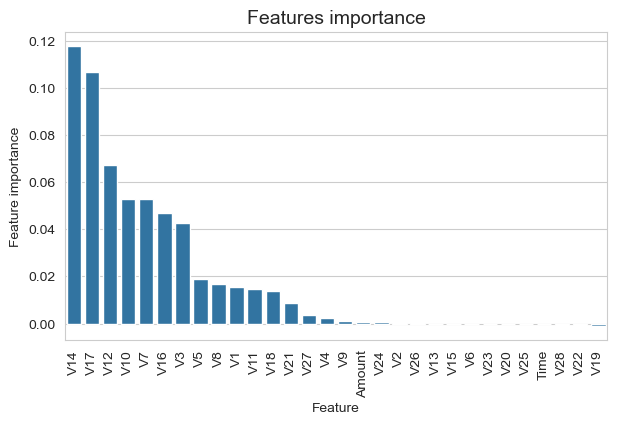

In [142]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': feature_importance})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

* The most important feature is <b>V14,V17,V12,V10,V7,V16</b> and <b>V3.</b>

<a id='10.5'></a>
## 10.5: Confusion Matrix
⤴️[Table Contents](#table_content)

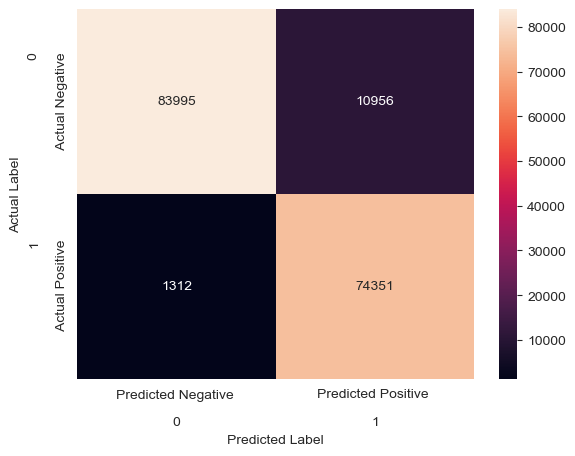

In [143]:
sns.heatmap(confusion_matrix(y_test_cvpred,y_test),annot=True,fmt='d',xticklabels=['Predicted Negative \n\n0', 'Predicted Positive \n\n1'], 
            yticklabels=['0\n\n Actual Negative', '1\n\n Actual Positive'])

# Add labels to the axes
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

- 11 means <b>(True Positive)</b>
- 00 means <b>(True Negative)</b>
- 01 means <b>(False Positive)</b>
- 10 means <b>(False Negative)</b>

  - In this Naive Bayes Confusion Matrix plot show maximum values in the <b>True Postive</b> and in <b>True Negative</b> State but some of the values in the<b> False Positive</b> state also, which is not the good sign, because it means some time it gives wrong output of<b> False Positive.</b>

<a id='10.6'></a>
## 10.6: (ROC) Curve
⤴️[Table Contents](#table_content)

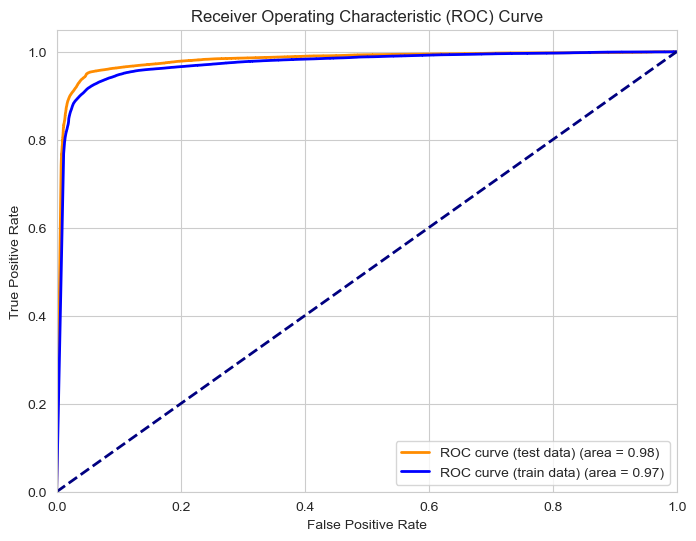

In [144]:
roc_curv(grid_search, X_train_scaled, y_train, X_test_scaled ,y_test)

<a id='11'></a>
# 11: k-Nearest Neighbors (k-NN) classifier Model
⤴️[Table Contents](#table_content)

In [145]:
# # Create the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [146]:
# Predict model
y_test_knnpred = knn.predict(X_test)

In [147]:
#Using accuracy score we are checking the accuracy on the testing dataset
print('K Neighbors Classifier Scores: \n')
knn_accuracy = accuracy_score(y_test_knnpred,y_test)
knn_recall = recall_score(y_test_knnpred,y_test)
knn_f1 = f1_score(y_test_knnpred,y_test)
knn_roc_auc = roc_auc_score(y_test_knnpred,y_test)
print('Accuracy    : ',knn_accuracy)
print('Recall      : ',knn_recall)
print("F1 Score    : ",knn_f1)
print("Auc_Score   : ",knn_roc_auc)

K Neighbors Classifier Scores: 

Accuracy    :  0.7208494027453785
Recall      :  0.9041704209035912
F1 Score    :  0.6389733249444743
Auc_Score   :  0.7780529523872795


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b>K Neighbors Classifier</b> Model we get <b>72%</b> of <b>accuracy score</b> which is Not as much good score, so in this case we should have to perform First <b>Scaling</b> then if required we perform <b>HyperParameter Tunning</b> right here for increasing best score</p>

<a id='11.1'></a>
# 11.1: Standard Scaling
⤴️[Table Contents](#table_content)

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [149]:
# # Create the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [150]:
# Predict model
y_test_knnpred_scaled = knn.predict(X_test_scaled)

<a id='11.2'></a>
## 11.2: Model Scores
⤴️[Table Contents](#table_content)

In [153]:
#Using accuracy score we are checking the accuracy on the testing dataset
print('K Neighbors Classifier After scaling Scores: \n')
knn_accuracy_scaled = accuracy_score(y_test_knnpred_scaled,y_test)
knn_recall_scaled = recall_score(y_test_knnpred_scaled,y_test)
knn_f1_scaled = f1_score(y_test_knnpred_scaled,y_test)
knn_roc_auc_scaled = roc_auc_score(y_test_knnpred_scaled,y_test)
print('Accuracy    : ',knn_accuracy)
print('Recall      : ',knn_recall)
print("F1 Score    : ",knn_f1)
print("Auc_Score   : ",knn_roc_auc)

K Neighbors Classifier After scaling Scores: 

Accuracy    :  0.9429237928892119
Recall      :  0.9980885590371611
F1 Score    :  0.9395778265887346
Auc_Score   :  0.9484242594668683


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note: 📝</h3>
    <p>In the <b> K Neighbors Classifier</b> Model After Scaling we get <b>94%</b> of <b>accuracy score</b> which is best score, so there is no need to perform <b>HyperParameter Tunning</b> right here</p>

<a id='11.3'></a>
## 11.3: Confusion Matrix
⤴️[Table Contents](#table_content)

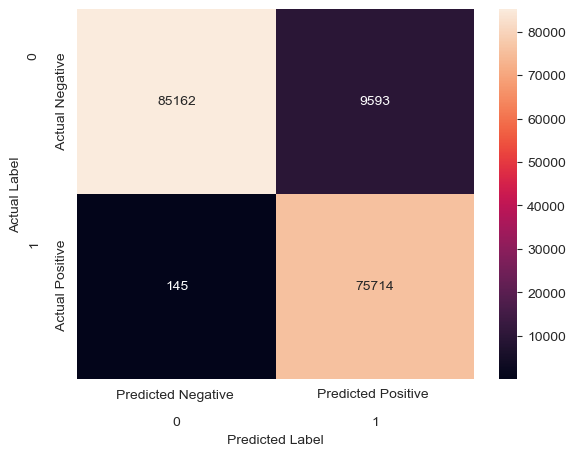

In [152]:
sns.heatmap(confusion_matrix(y_test_knnpred_scaled,y_test),annot=True,fmt='d',xticklabels=['Predicted Negative \n\n0', 'Predicted Positive \n\n1'], 
            yticklabels=['0\n\n Actual Negative', '1\n\n Actual Positive'])

# Add labels to the axes
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

- 11 means <b>(True Positive)</b>
- 00 means <b>(True Negative)</b>
- 01 means <b>(False Positive)</b>
- 10 means <b>(False Negative)</b>

   - In this KNeighbors Classifier Confusion Matrix plot show maximum values in the <b>True Postive</b> and in <b>True Negative</b> State but some of the values in the<b> False Positive</b> state also, which is not the good sign, because it means some time it gives wrong output of<b> False Positive.</b>

<a id='11.4'></a>
## 11.4: (ROC) Curv
⤴️[Table Contents](#table_content)

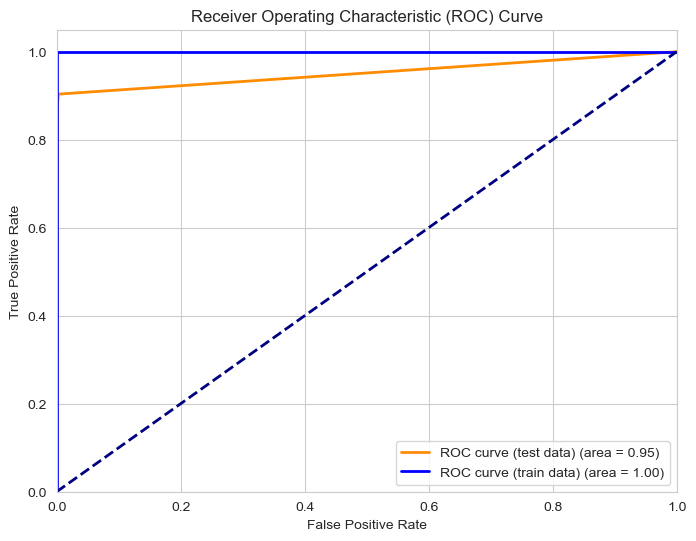

In [154]:
roc_curv(knn, X_train_scaled, y_train, X_test_scaled ,y_test)

<a id='12'></a>
# 12: Compare All Models scores :
⤴️[Table Contents](#table_content)

In [155]:
Compare = { 'Models' : ['Logistic Regression','Random Forest Classifier','XGboost Classifier','Decision Tree Classifier','Naive Bayes Classifier',
                        'k-Nearest Neighbors classifier'],
           'Accuracy Score' : [lr_accuracy, rfmodel_accuracy, xgb_accuracy, dt_accuracy, grid_accuracy, knn_accuracy_scaled],
           'Recall Score' :  [lr_recall, rfmodel_recall, xgb_recall, dt_recall, grid_recall, knn_recall_scaled],
           'F1 Score' :  [lr_f1, rfmodel_f1, xgb_f1, dt_f1, grid_f1, knn_f1_scaled],
           'Roc_Auc Score' : [lr_roc_auc, rfmodel_roc_auc, xgb_roc_auc, dt_roc_auc, grid_roc_auc, knn_roc_auc_scaled]
          }

pd.DataFrame(Compare)

,Models,Accuracy Score,Recall Score,F1 Score,Roc_Auc Score
0,Logistic Regression,0.976327,0.983565,0.976148,0.976433
1,Random Forest Classifier,0.971415,0.999677,0.970583,0.972928
2,XGboost Classifier,0.977405,0.999497,0.976894,0.978341
3,Decision Tree Classifier,0.957741,0.997807,0.955969,0.960725
4,Naive Bayes Classifier,0.928095,0.982660,0.923787,0.933637
5,k-Nearest Neighbors classifier,0.942924,0.998089,0.939578,0.948424


In [156]:
df = pd.DataFrame(Compare)

# Normalize scores to be in the range [0, 1]
df['Accuracy Score Norm'] = df['Accuracy Score'] / df['Accuracy Score'].max()
df['Recall Score Norm'] = df['Recall Score'] / df['Recall Score'].max()
df['F1 Score Norm'] = df['F1 Score'] / df['F1 Score'].max()
df['Roc_Auc Score Norm'] = df['Roc_Auc Score'] / df['Roc_Auc Score'].max()

# Compute a combined score (average of normalized scores)
df['Combined Score'] = df[['Accuracy Score Norm', 'Recall Score Norm', 'F1 Score Norm', 'Roc_Auc Score Norm']].mean(axis=1)

# Identify the best model
best_model = df.loc[df['Combined Score'].idxmax()]

print("Best Model:")
print(best_model)

Best Model:
Models                 XGboost Classifier
Accuracy Score                   0.977405
Recall Score                     0.999497
F1 Score                         0.976894
Roc_Auc Score                    0.978341
Accuracy Score Norm                   1.0
Recall Score Norm                 0.99982
F1 Score Norm                         1.0
Roc_Auc Score Norm                    1.0
Combined Score                   0.999955
Name: 2, dtype: object


<div style="background-color: #FDEBD0 ; padding: 10px 12px; border: 2px solid #E67E22; border-radius: 20px;">
<h3>Note 📝: </h3>

 * The Best Model i found is <b>XGboost Classifier</b> on the basis of <b>Accuracy, Recall, F1</b> and <b>Roc_Auc_Score</b>